# PROJECT TITLE : HOUSING_PRICE PREDICTION

# Problem Statement:
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
The company is looking at prospective properties to buy houses to enter the market. We are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know:
• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house?
# Business Goal:
We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the data-set
df=pd.read_csv("Housing Project_train_dataset.csv")
df_train=df.copy()
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
5,1197,60,RL,58.0,14054,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,New,Partial,219210
6,561,20,RL,NaN,11341,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,121500
7,1041,20,RL,88.0,13125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,1,2006,WD,Normal,155000
8,503,20,RL,70.0,9170,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,400,4,2007,WD,Normal,140000
9,576,50,RL,80.0,8480,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,COD,Abnorml,118500


In [3]:
#printing the all the Features and sample datas from the Data Frame
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
5,1197,60,RL,58.0,14054,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,879,879,GasA,Ex,Y,SBrkr,879,984,0,1863,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2006.0,Fin,3,660,TA,TA,Y,100,17,0,0,0,0,NaN,NaN,NaN,0,11,2006,New,Partial,219210
6,561,20,RL,NaN,11341,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1957,1996,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,Gd,TA,No,ALQ,1302,Unf,0,90,1392,GasA,TA,Y,SBrkr,1392,0,0,1392,1,0,1,1,3,1,TA,5,Mod,1,Gd,Detchd,1957.0,Unf,2,528,TA,TA,Y,0,0,0,0,95,0,NaN,NaN,NaN,0,5,2010,WD,Normal,121500
7,1041,20,RL,88.0,13125,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,4,1957,2000,Gable,CompShg,Wd Sdng,Wd Sdng,BrkCmn,67.0,TA,TA,CBlock,TA,TA,No,Rec,168,BLQ,682,284,1134,GasA,Ex,Y,SBrkr,1803,0,0,1803,1,0,2,0,3,1,TA,8,Maj1,1,TA,Attchd,1957.0,RFn,2,484,TA,TA,Y,0,0,0,0,0,0,NaN,GdPrv,NaN,0,1,2006,WD,Normal,155000
8,503,20,RL,70.0,9170,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,1Story,5,7,1965,1965,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,698,GLQ,96,420,1214,GasA,Ex,Y,SBrkr,1214,0,0,1214,1,0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1965.0,Unf,2,461,Fa,Fa,Y,0,0,184,0,0,0,NaN,GdPrv,Shed,400,4,2007,WD,Normal,140000
9,576,50,RL,80.0,8480,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1.5Fin,5,5,1947,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,442,Unf,0,390,832,Gas

In [4]:
#checking the shape of the data-set
df_train.shape

(1168, 81)

In [5]:
#checking all the column names
list(df_train.columns)

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [6]:
#checking the data type and null values of the variables in the data-set
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [7]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1168.0,724.136130,416.159877,1.0,360.50,714.5,1079.5,1460.0
MSSubClass,1168.0,56.767979,41.940650,20.0,20.00,50.0,70.0,190.0
LotFrontage,954.0,70.988470,24.828750,21.0,60.00,70.0,80.0,313.0
LotArea,1168.0,10484.749144,8957.442311,1300.0,7621.50,9522.5,11515.5,164660.0
OverallQual,1168.0,6.104452,1.390153,1.0,5.00,6.0,7.0,10.0
OverallCond,1168.0,5.595890,1.124343,1.0,5.00,5.0,6.0,9.0
YearBuilt,1168.0,1970.930651,30.145255,1875.0,1954.00,1972.0,2000.0,2010.0
YearRemodAdd,1168.0,1984.758562,20.785185,1950.0,1966.00,1993.0,2004.0,2010.0
MasVnrArea,1161.0,102.310078,182.595606,0.0,0.00,0.0,160.0,1600.0
BsmtFinSF1,1168.0,444.726027,462.664785,0.0,0.00,385.5,714.5,5644.0


In [8]:
# Describing object types
df_train.describe(include='object').T

,count,unique,top,freq
MSZoning,1168,5,RL,928
Street,1168,2,Pave,1164
Alley,77,2,Grvl,41
LotShape,1168,4,Reg,740
LandContour,1168,4,Lvl,1046
Utilities,1168,1,AllPub,1168
LotConfig,1168,5,Inside,842
LandSlope,1168,3,Gtl,1105
Neighborhood,1168,25,NAmes,182
Condition1,1168,9,Norm,1005


# Handling the Null Values : 

In [9]:
#checking the null values 
for col in df_train.columns:
    print("\nTitle :",col,"\nNaN val:",df_train[col].isnull().sum())


Title : Id 
NaN val: 0

Title : MSSubClass 
NaN val: 0

Title : MSZoning 
NaN val: 0

Title : LotFrontage 
NaN val: 214

Title : LotArea 
NaN val: 0

Title : Street 
NaN val: 0

Title : Alley 
NaN val: 1091

Title : LotShape 
NaN val: 0

Title : LandContour 
NaN val: 0

Title : Utilities 
NaN val: 0

Title : LotConfig 
NaN val: 0

Title : LandSlope 
NaN val: 0

Title : Neighborhood 
NaN val: 0

Title : Condition1 
NaN val: 0

Title : Condition2 
NaN val: 0

Title : BldgType 
NaN val: 0

Title : HouseStyle 
NaN val: 0

Title : OverallQual 
NaN val: 0

Title : OverallCond 
NaN val: 0

Title : YearBuilt 
NaN val: 0

Title : YearRemodAdd 
NaN val: 0

Title : RoofStyle 
NaN val: 0

Title : RoofMatl 
NaN val: 0

Title : Exterior1st 
NaN val: 0

Title : Exterior2nd 
NaN val: 0

Title : MasVnrType 
NaN val: 7

Title : MasVnrArea 
NaN val: 7

Title : ExterQual 
NaN val: 0

Title : ExterCond 
NaN val: 0

Title : Foundation 
NaN val: 0

Title : BsmtQual 
NaN val: 30

Title : BsmtCond 
NaN val: 3

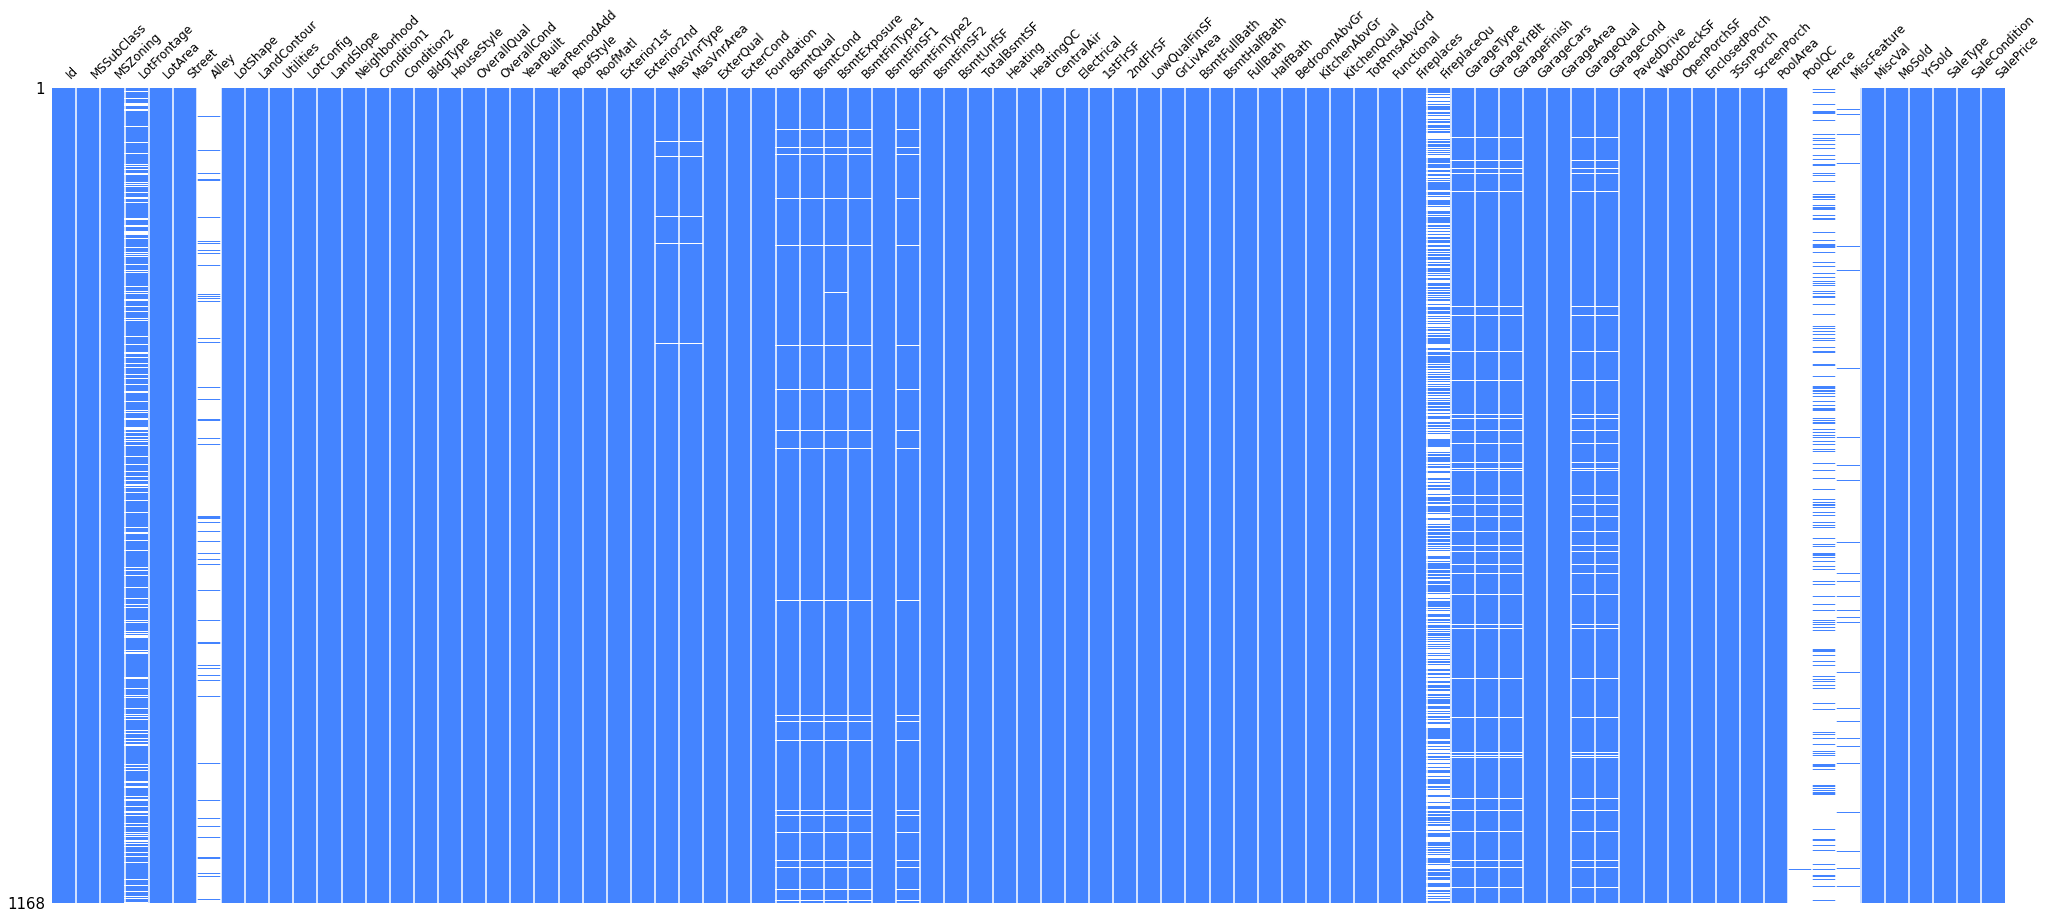

In [10]:
# Program to visualize missing values in dataset
# Importing the libraries
import missingno as msno
# Visualize missing values as a matrix
msno.matrix(df_train,labels=True, sparkline=False, figsize=(35,15), fontsize=12, color=(0.27, 0.52, 1.0))

# Observation:

    We could see that the columns:

    1.'LotFrontage'
    2.'Alley'
    3.'MasVnrType'
    4.'MasVnrArea'
    5.'BsmtQual'
    6.'ExterCond'
    7.'BsmtExposure'
    8.'BsmtFinType1'
    9.'BsmtFinType2'
    10.'FireplaceQu'
    11.'GarageType'
    12.'GarageYrBlt'
    13.'GarageFinish'
    14.'GarageQual'
    15.'GarageCond'
    16.'PoolQC'
    17.'Fence'
    18.'MiscFeature' 

    are having Nan Values present in them. so we will see the percentage of the Nan values in each coulumns.

In [11]:
#finding the percentage of null values in each columns
df_train.isna().mean().round(4) * 100

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      18.32
LotArea           0.00
Street            0.00
Alley            93.41
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.60
MasVnrArea        0.60
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.57
BsmtCond          2.57
BsmtExposure      2.65
BsmtFinType1      2.57
BsmtFinSF1        0.00
BsmtFinType2      2.65
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.00
1stFlrSF   

# Now we will try to impute the Nan values individually. since the data-set contains both catagorical and continous data, we will look into each column containing Nan values individually and impute them accordingly.

# Also, some of the Nan values are not actually null. They are missing some data entry, which is given in the Data-set description.

# Catagorical data Null values imputation :

In [12]:
df_train["Alley"].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [13]:
df_train["Alley"].value_counts()

Grvl    41
Pave    36
Name: Alley, dtype: int64

In [14]:
df_train["Alley"].fillna("NA",inplace=True)
df_train["Alley"].isnull().sum()

0

In [15]:
df_train['Fence'].unique()

array([nan, 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [16]:
df_train['Fence'].value_counts()

MnPrv    129
GdPrv     51
GdWo      47
MnWw      10
Name: Fence, dtype: int64

In [17]:
df_train["Fence"].fillna("NA",inplace=True)
df_train["Fence"].isnull().sum()

0

In [18]:
df_train["PoolQC"].unique()

array([nan, 'Ex', 'Gd', 'Fa'], dtype=object)

In [19]:
df_train['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [20]:
df_train["PoolQC"].fillna("NA",inplace=True)
df_train["PoolQC"].isnull().sum()

0

In [21]:
df_train["MiscFeature"].unique()

array([nan, 'Shed', 'Gar2', 'TenC', 'Othr'], dtype=object)

In [22]:
df_train['MiscFeature'].value_counts()

Shed    40
Gar2     2
TenC     1
Othr     1
Name: MiscFeature, dtype: int64

In [23]:
df_train["MiscFeature"].fillna("NA",inplace=True)
df_train["MiscFeature"].isnull().sum()

0

In [24]:
df_train["FireplaceQu"].unique()

array(['TA', 'Gd', nan, 'Fa', 'Ex', 'Po'], dtype=object)

In [25]:
df_train['FireplaceQu'].value_counts()

Gd    301
TA    252
Fa     25
Ex     21
Po     18
Name: FireplaceQu, dtype: int64

In [26]:
df_train["FireplaceQu"].fillna("NA",inplace=True)
df_train["FireplaceQu"].isnull().sum()

0

In [27]:
df_train["GarageType"].unique()

array(['Attchd', 'BuiltIn', 'Detchd', 'Basment', nan, '2Types', 'CarPort'],
      dtype=object)

In [28]:
df_train['GarageType'].value_counts()

Attchd     691
Detchd     314
BuiltIn     70
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64

In [29]:
df_train["GarageType"].fillna("NA",inplace=True)
df_train["GarageType"].isnull().sum()

0

In [30]:
df_train["GarageFinish"].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [31]:
df_train['GarageFinish'].value_counts()

Unf    487
RFn    339
Fin    278
Name: GarageFinish, dtype: int64

In [32]:
df_train["GarageFinish"].fillna("NA",inplace=True)
df_train["GarageFinish"].isnull().sum()

0

In [33]:
df_train["GarageQual"].unique()

array(['TA', 'Fa', nan, 'Gd', 'Ex', 'Po'], dtype=object)

In [34]:
df_train['GarageQual'].value_counts()

TA    1050
Fa      39
Gd      11
Po       2
Ex       2
Name: GarageQual, dtype: int64

In [35]:
df_train["GarageQual"].fillna("NA",inplace=True)
df_train["GarageQual"].isnull().sum()

0

In [36]:
df_train["GarageCond"].unique()

array(['TA', 'Fa', 'Gd', nan, 'Po', 'Ex'], dtype=object)

In [37]:
df_train['GarageCond'].value_counts()

TA    1061
Fa      28
Gd       8
Po       6
Ex       1
Name: GarageCond, dtype: int64

In [38]:
df_train["GarageCond"].fillna("NA",inplace=True)
df_train["GarageCond"].isnull().sum()

0

In [39]:
df_train["BsmtQual"].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [40]:
df_train['BsmtQual'].value_counts()

TA    517
Gd    498
Ex     94
Fa     29
Name: BsmtQual, dtype: int64

In [41]:
df_train["BsmtQual"].fillna("NA",inplace=True)
df_train["BsmtQual"].isnull().sum()

0

In [42]:
df_train["BsmtCond"].unique()

array(['TA', 'Gd', 'Fa', nan, 'Po'], dtype=object)

In [43]:
df_train['BsmtCond'].value_counts()

TA    1041
Gd      56
Fa      39
Po       2
Name: BsmtCond, dtype: int64

In [44]:
df_train["BsmtCond"].fillna("NA",inplace=True)
df_train["BsmtCond"].isnull().sum()

0

In [45]:
df_train["BsmtExposure"].unique()

array(['No', 'Gd', 'Av', 'Mn', nan], dtype=object)

In [46]:
df_train['BsmtExposure'].value_counts()

No    756
Av    180
Gd    108
Mn     93
Name: BsmtExposure, dtype: int64

In [47]:
df_train["BsmtExposure"].fillna("NA",inplace=True)
df_train["BsmtExposure"].isnull().sum()

0

In [48]:
df_train["BsmtFinType1"].unique()

array(['ALQ', 'GLQ', 'BLQ', 'Unf', 'Rec', 'LwQ', nan], dtype=object)

In [49]:
df_train['BsmtFinType1'].value_counts()

Unf    345
GLQ    330
ALQ    174
BLQ    121
Rec    109
LwQ     59
Name: BsmtFinType1, dtype: int64

In [50]:
df_train["BsmtFinType1"].fillna("NA",inplace=True)
df_train["BsmtFinType1"].isnull().sum()

0

In [51]:
df_train["BsmtFinType2"].unique()

array(['Unf', 'Rec', 'BLQ', 'GLQ', nan, 'ALQ', 'LwQ'], dtype=object)

In [52]:
df_train['BsmtFinType2'].value_counts()

Unf    1002
Rec      43
LwQ      40
BLQ      24
ALQ      16
GLQ      12
Name: BsmtFinType2, dtype: int64

In [53]:
df_train["BsmtFinType2"].fillna("NA",inplace=True)
df_train["BsmtFinType2"].isnull().sum()

0

In [54]:
df_train["MasVnrType"].unique()

array(['None', 'BrkFace', 'Stone', 'BrkCmn', nan], dtype=object)

In [55]:
df_train['MasVnrType'].value_counts()

None       696
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64

In [56]:
df_train["MasVnrType"].fillna("NA",inplace=True)
df_train["MasVnrType"].isnull().sum()

0

# Continous data Null value imputation

In [57]:
df_train['MasVnrArea'].value_counts()

0.0       692
72.0        7
120.0       6
180.0       6
106.0       5
80.0        5
108.0       5
84.0        5
246.0       4
320.0       4
160.0       4
132.0       4
360.0       4
288.0       4
340.0       4
300.0       4
40.0        4
168.0       4
336.0       4
178.0       4
216.0       4
16.0        4
220.0       4
210.0       4
100.0       4
256.0       3
128.0       3
130.0       3
99.0        3
110.0       3
456.0       3
174.0       3
183.0       3
208.0       3
170.0       3
350.0       3
85.0        3
104.0       3
186.0       3
82.0        3
200.0       3
70.0        3
252.0       3
423.0       2
302.0       2
176.0       2
145.0       2
335.0       2
232.0       2
143.0       2
306.0       2
289.0       2
140.0       2
112.0       2
50.0        2
1.0         2
166.0       2
184.0       2
172.0       2
304.0       2
362.0       2
113.0       2
206.0       2
66.0        2
233.0       2
18.0        2
189.0       2
182.0       2
272.0       2
74.0        2
44.0        2
68.0  

In [58]:
df_train["MasVnrArea"].fillna(df_train["MasVnrArea"].mean(),inplace=True)
df_train["MasVnrArea"].isnull().sum()

0

In [59]:
df_train['LotFrontage'].value_counts()

60.0     111
80.0      60
70.0      58
75.0      46
50.0      44
65.0      35
85.0      26
90.0      20
78.0      19
73.0      16
24.0      16
68.0      16
79.0      14
21.0      14
64.0      14
72.0      13
51.0      13
55.0      13
100.0     12
82.0      12
59.0      12
63.0      11
74.0      11
71.0      11
53.0      10
66.0      10
69.0      10
88.0      10
34.0       9
67.0       9
84.0       9
52.0       8
40.0       8
43.0       8
76.0       8
92.0       8
77.0       8
62.0       7
57.0       7
61.0       7
86.0       7
35.0       7
95.0       7
44.0       6
81.0       6
94.0       6
41.0       6
54.0       6
96.0       6
98.0       6
120.0      6
87.0       5
30.0       5
58.0       5
36.0       5
107.0      5
89.0       5
105.0      5
93.0       5
91.0       4
49.0       4
32.0       3
130.0      3
110.0      3
103.0      3
48.0       3
108.0      3
99.0       3
37.0       3
104.0      3
47.0       3
56.0       3
83.0       3
121.0      2
122.0      2
134.0      2
174.0      2

In [60]:
df_train["LotFrontage"].fillna(df_train["LotFrontage"].mean(),inplace=True)
df_train["LotFrontage"].isnull().sum()

0

# "GarageYrBlt" is having 64 null values. These column contains year of the builiding built. Thus Imputing this column with artificial values wont help us in anyway. so will will drop the Nan values in the column.

In [61]:
df_train=df_train.dropna()

In [62]:
df_train.shape

(1104, 81)

In [63]:
df_train.shape

(1104, 81)

# Also, we find that "ID" column and "Utilities" column are not giving any values to the present data-set. so we will drop them from the data-set.

In [64]:
df_train.drop(["Id"],axis=1,inplace=True)
df_train.drop(["Utilities"],axis=1,inplace=True)

In [65]:
df_train.shape

(1104, 79)

# Checking for Null values : 

In [66]:
df_train.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

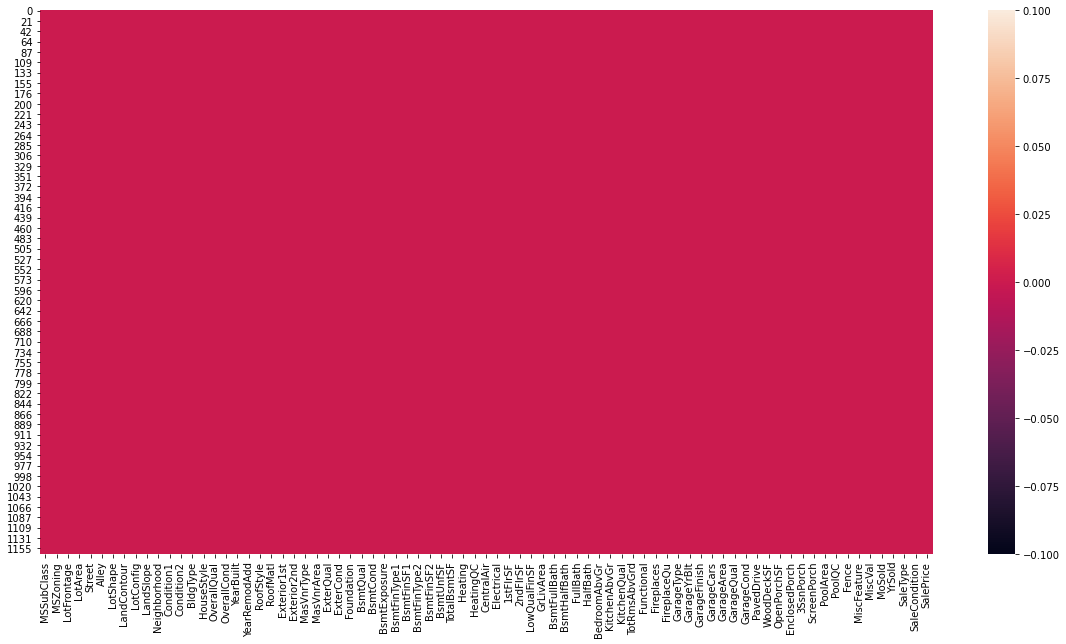

In [67]:
# Confirming null values
plt.figure(figsize=(20,10))
sn.heatmap(df_train.isnull())
plt.show()

# Now we will check the corelation between the Variables towards the target variable which is "Sales Price".

Text(0.5, 1.0, 'Correlation with target variable')

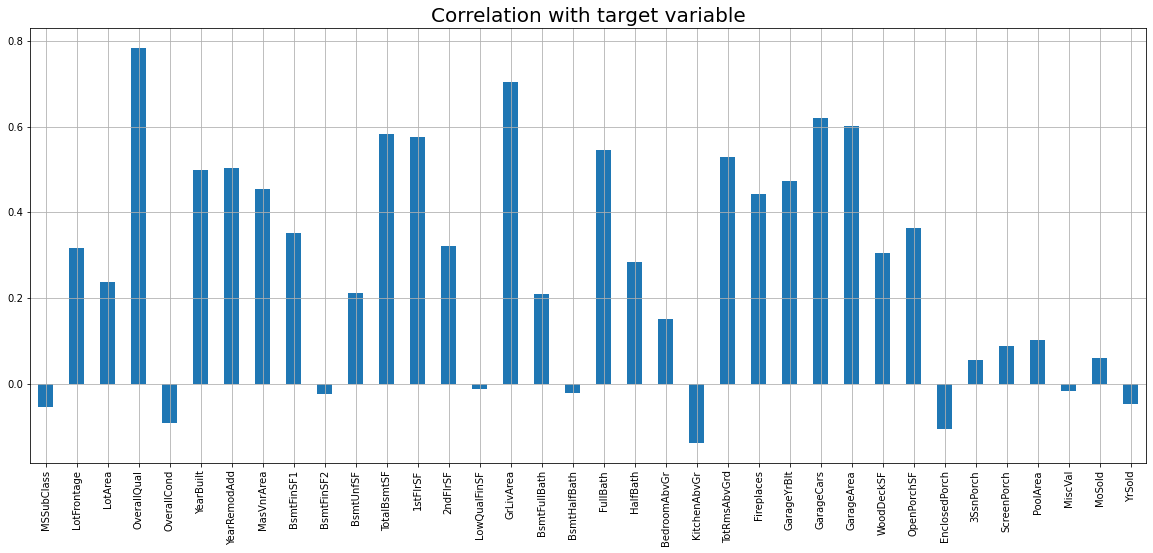

In [68]:
plt.figure(figsize=(20,8))
df_train.drop('SalePrice',axis=1).corrwith(df_train['SalePrice']).plot(kind='bar',grid=True)
plt.xticks(rotation=90)
plt.title("Correlation with target variable",fontsize=20)

# Apart from 
# Mssubclass,overallQual,BsmtFinSf2,LowQualFinSF,BsmtHalfBath,KitchenAbvGr,EnclosedPorchAnd YRsold all the other variables are positively corelated with the target variable. 
# whereas the previously mentioned are negatively corelated.

# Now for further Data exploration Process we will divide the dataset into Catagorical and continous variables.

# Catagorical Variables :

In [69]:
cat_List = [x for x in df_train.columns if df_train[x].dtype==object]
list (cat_List)

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

# Continous Variables : 

In [70]:
num_List = [x for x in df_train.columns if x not in cat_List]
list (num_List)

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

# DATA VISUALIZATION :

# UNI-VARIATE ANALYSIS : 

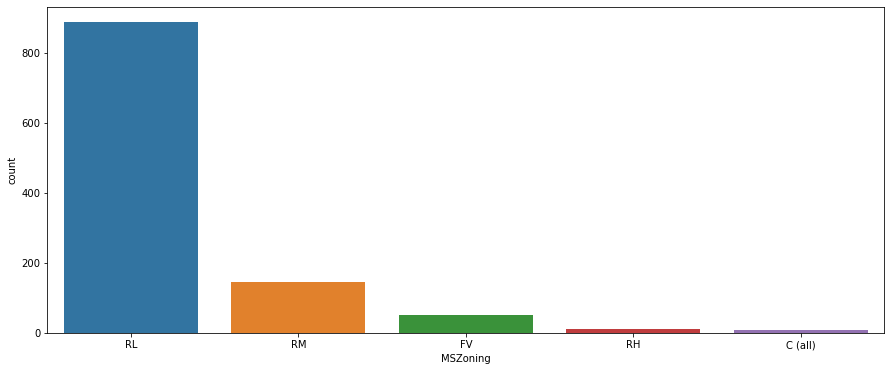

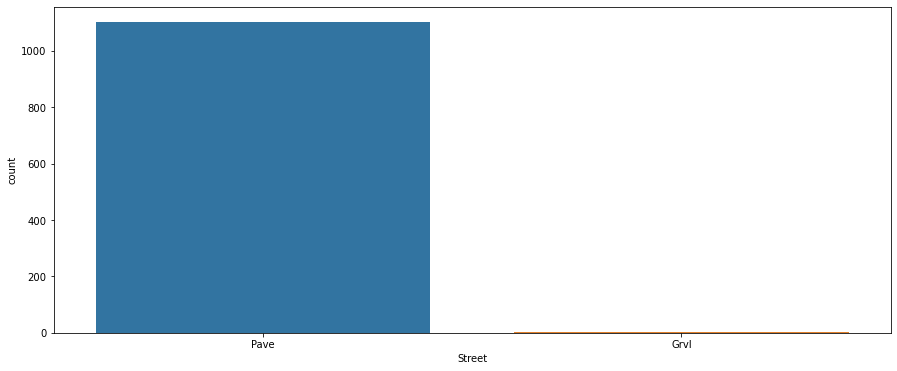

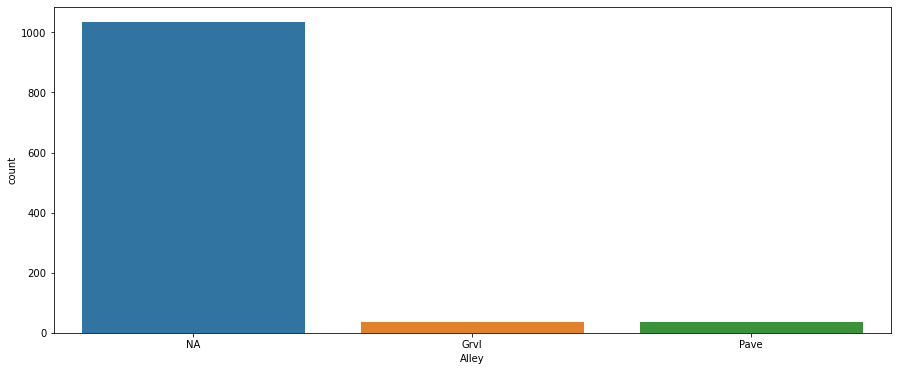

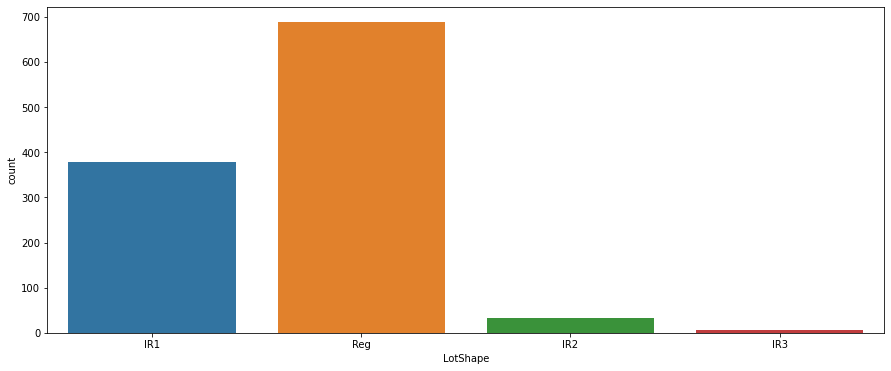

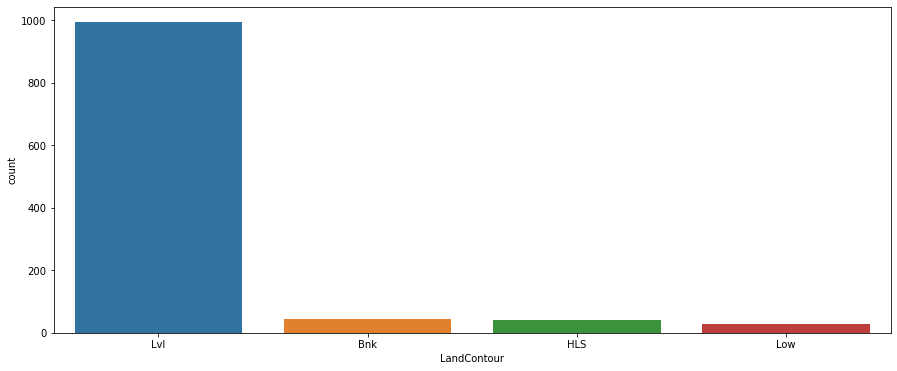

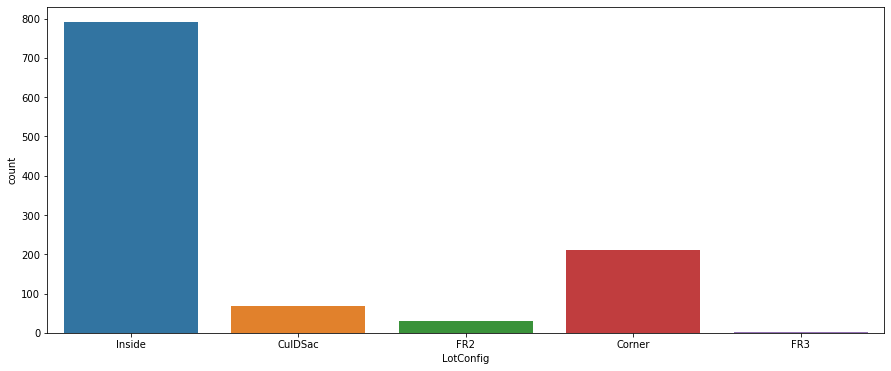

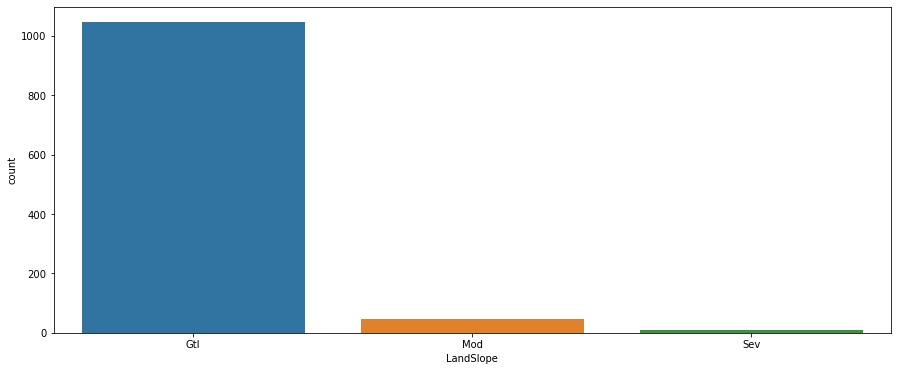

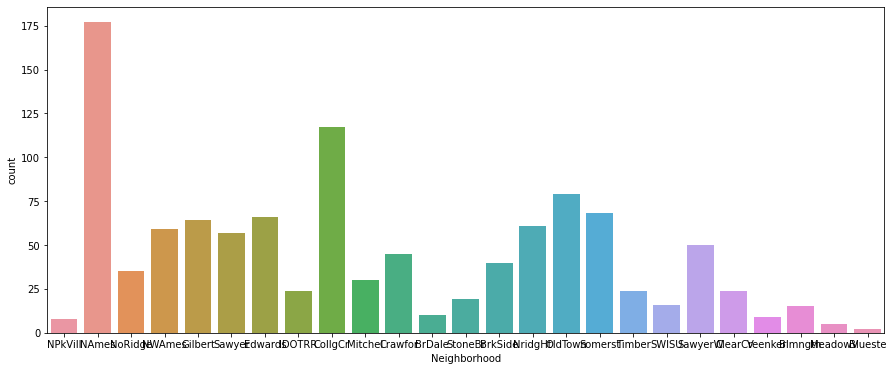

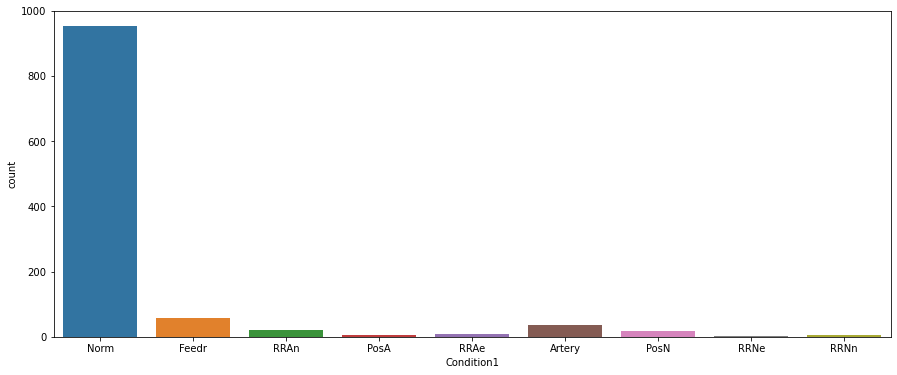

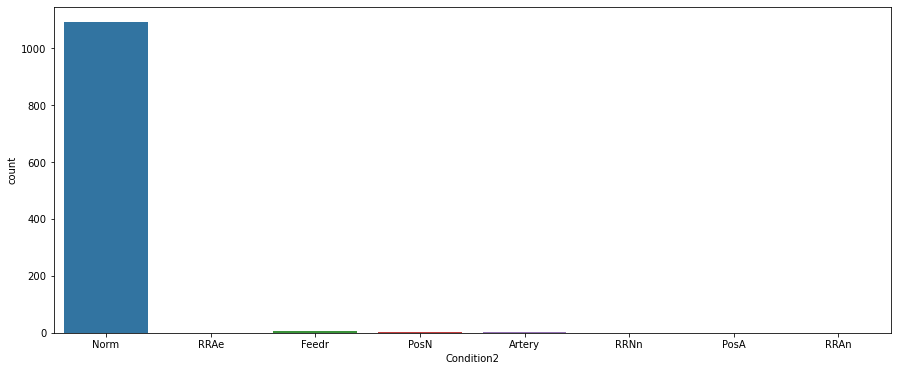

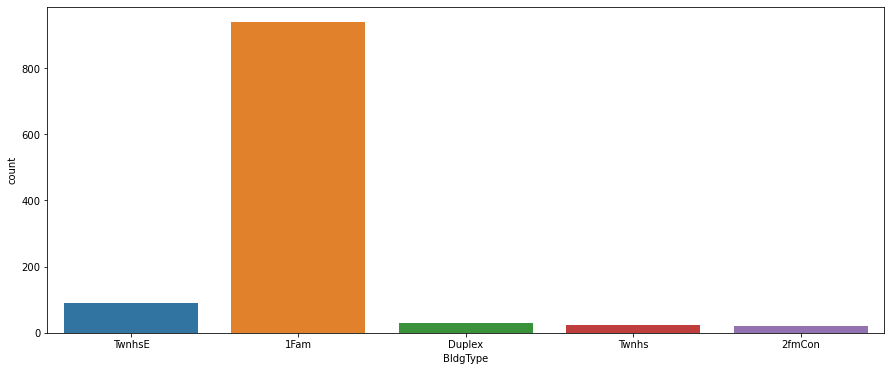

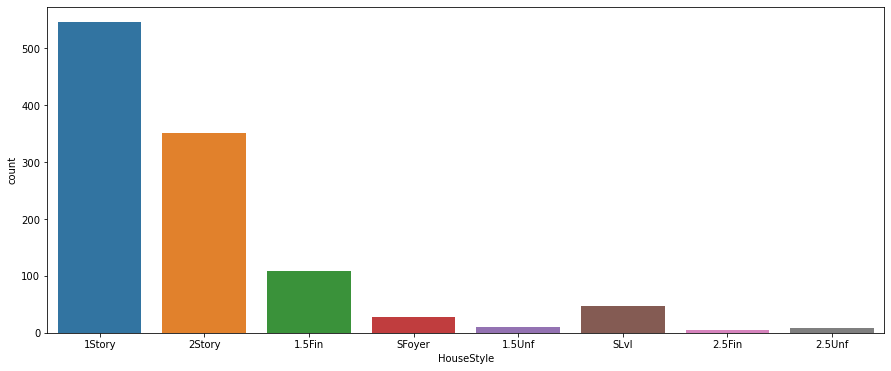

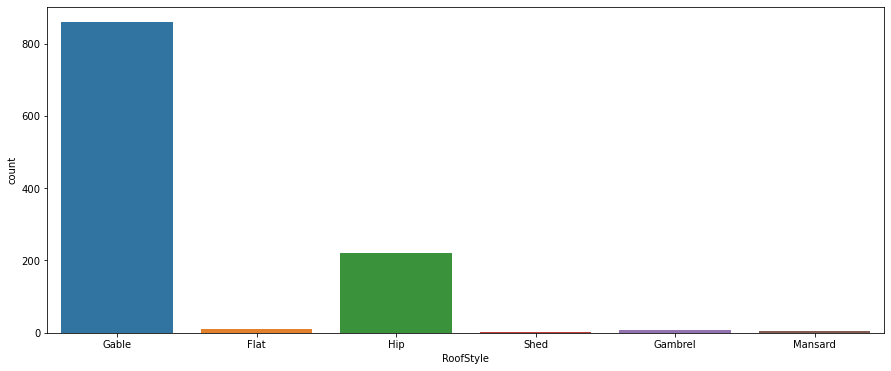

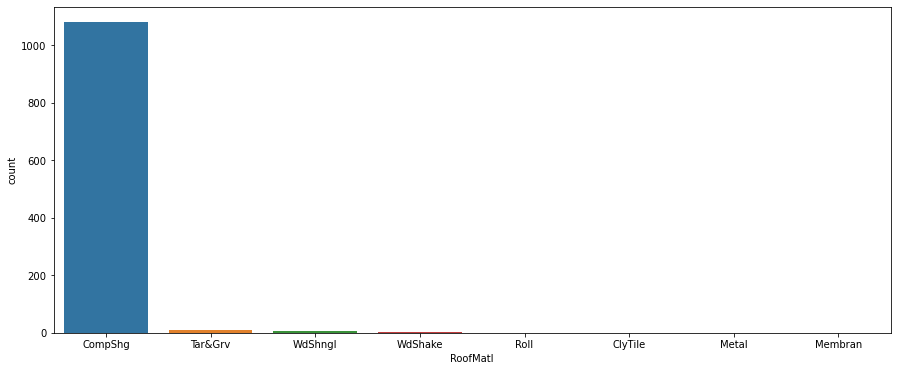

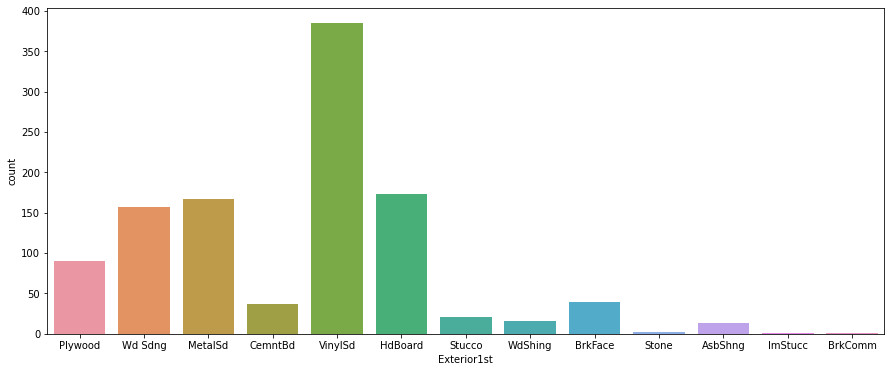

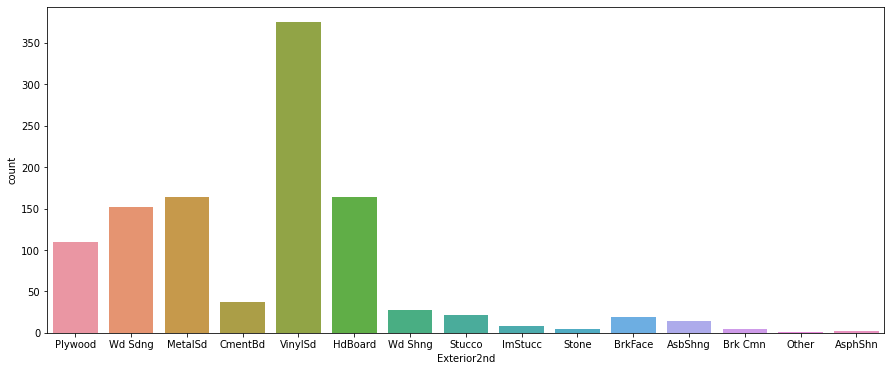

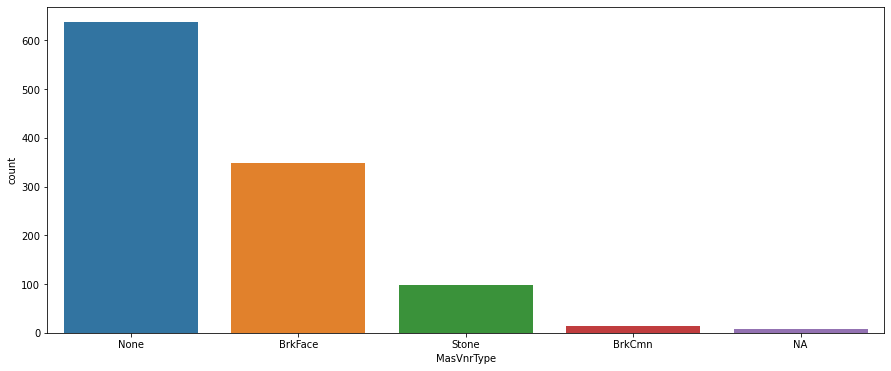

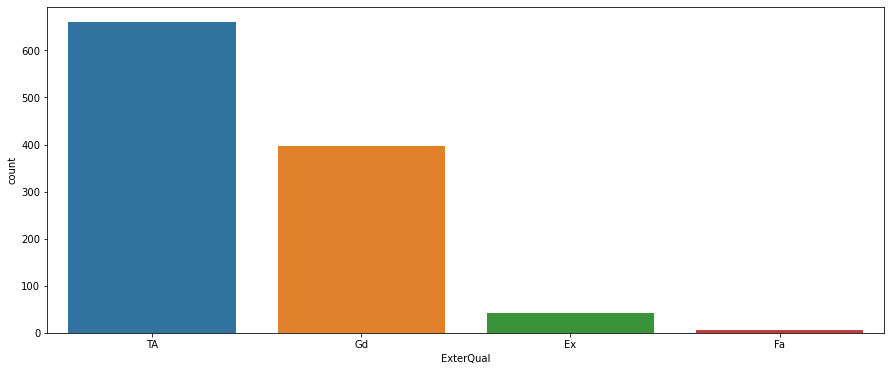

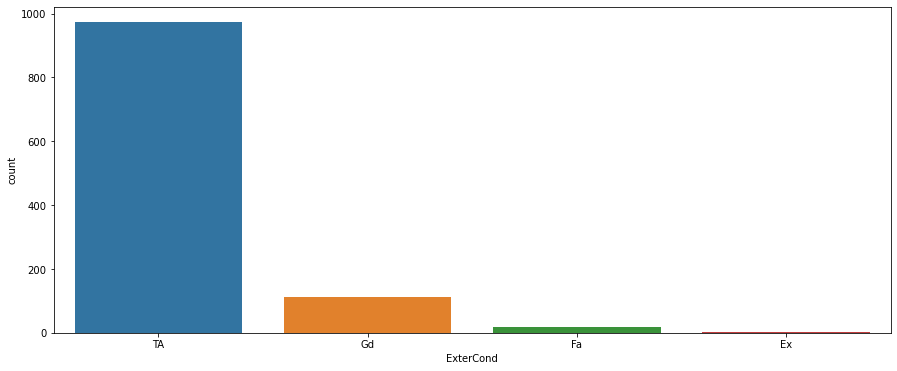

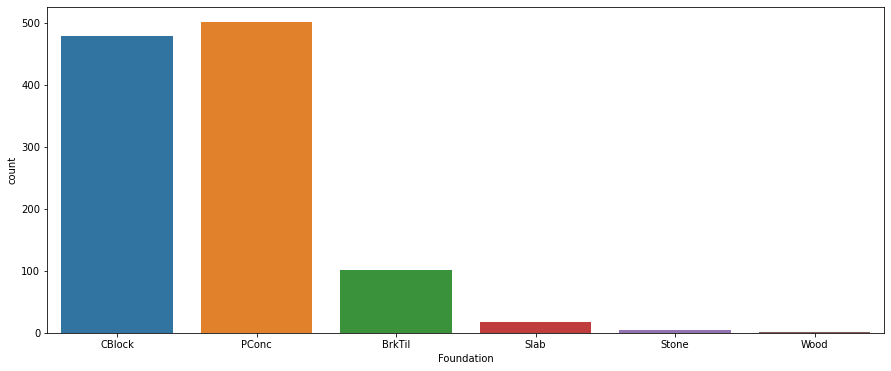

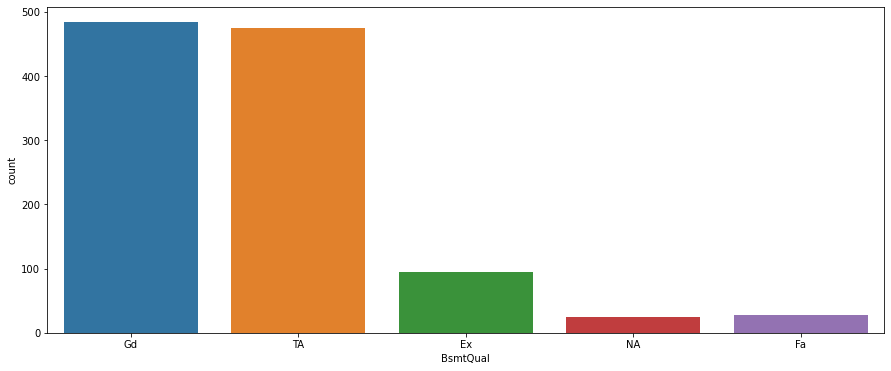

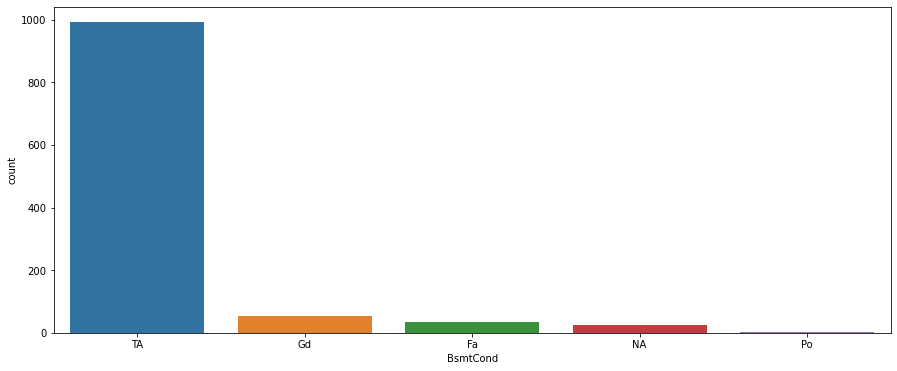

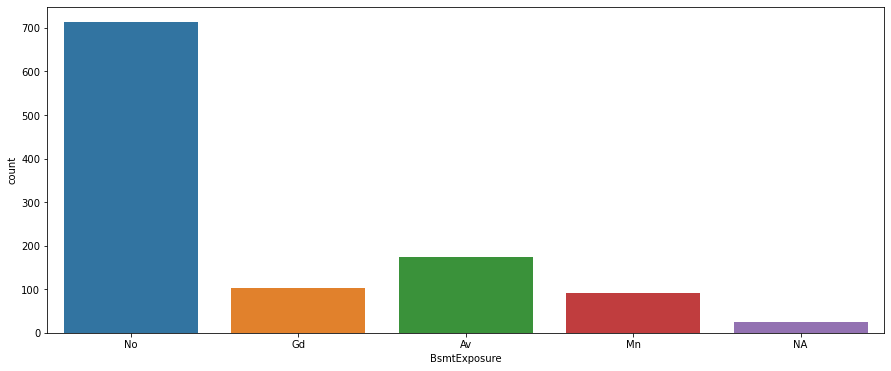

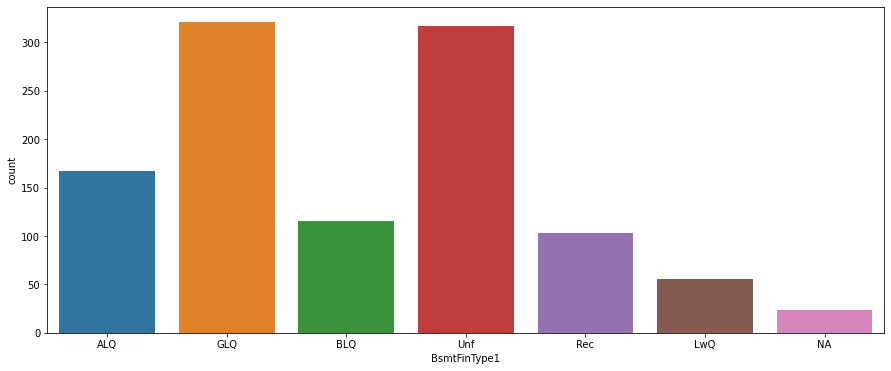

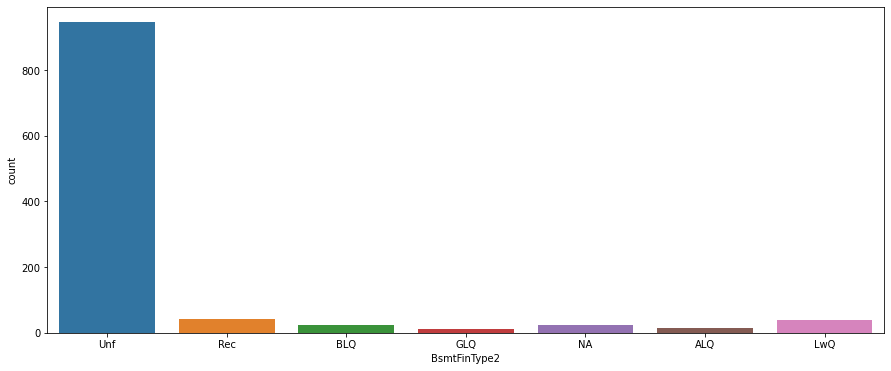

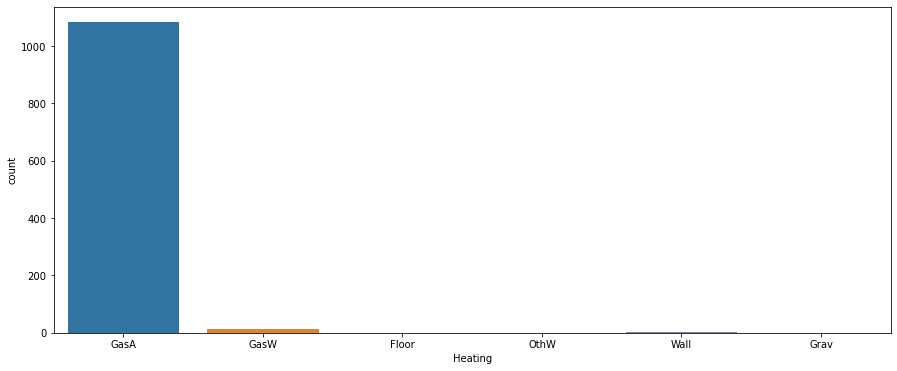

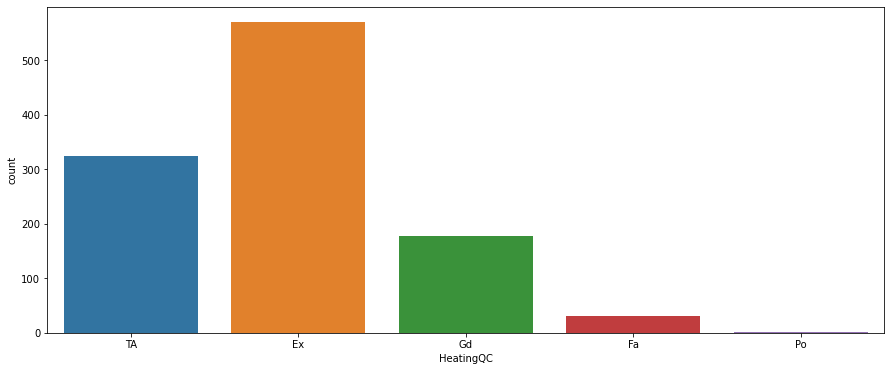

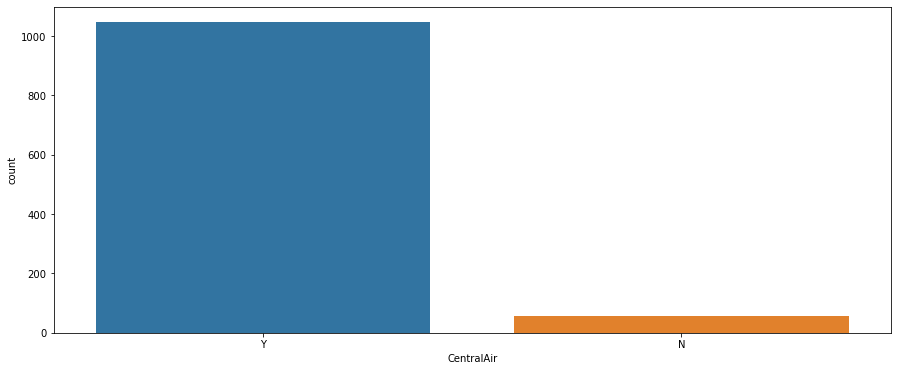

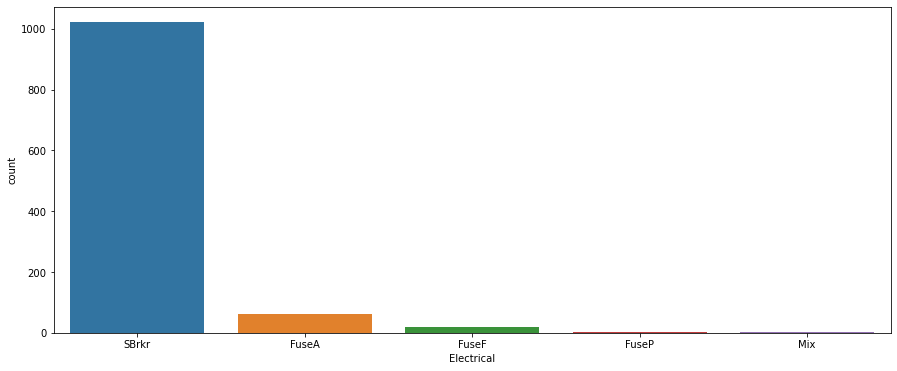

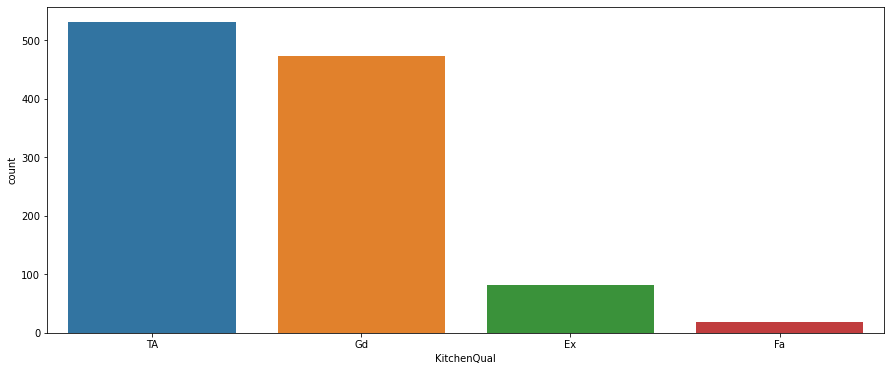

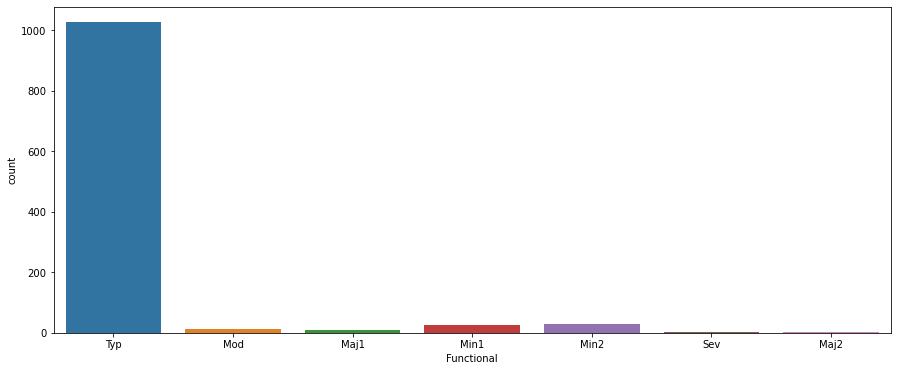

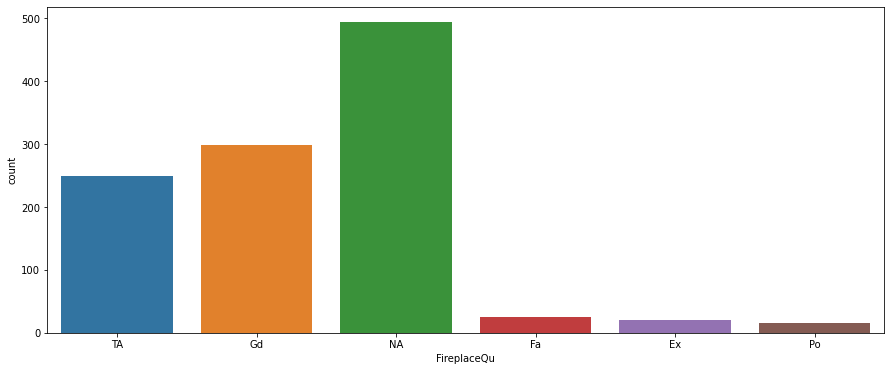

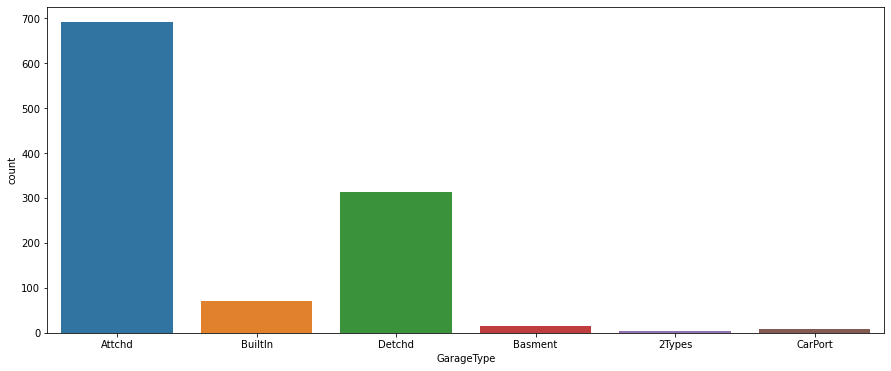

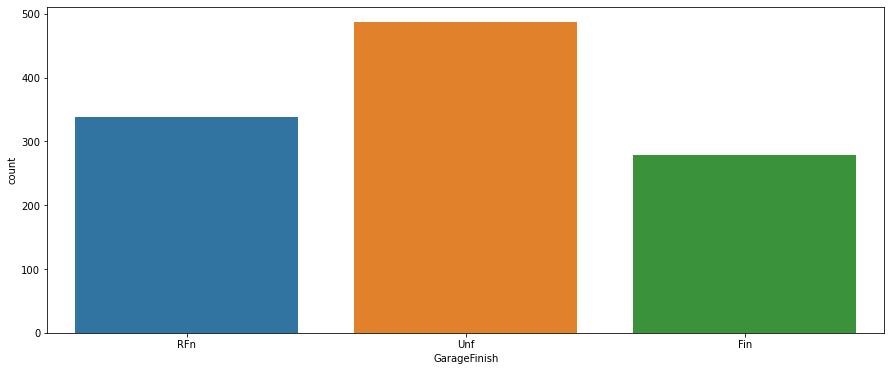

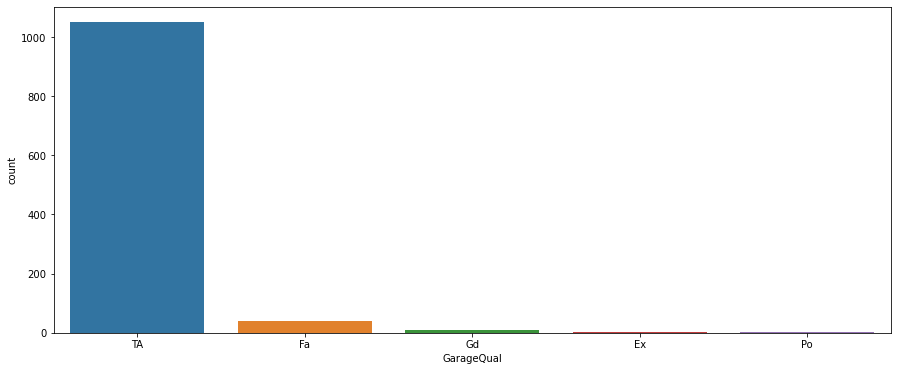

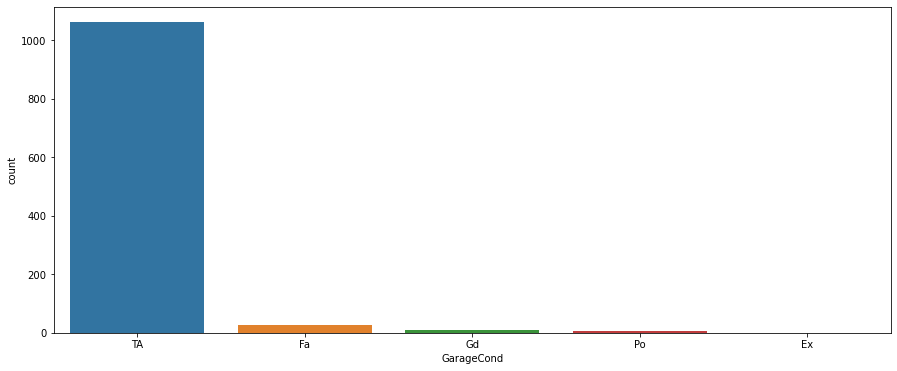

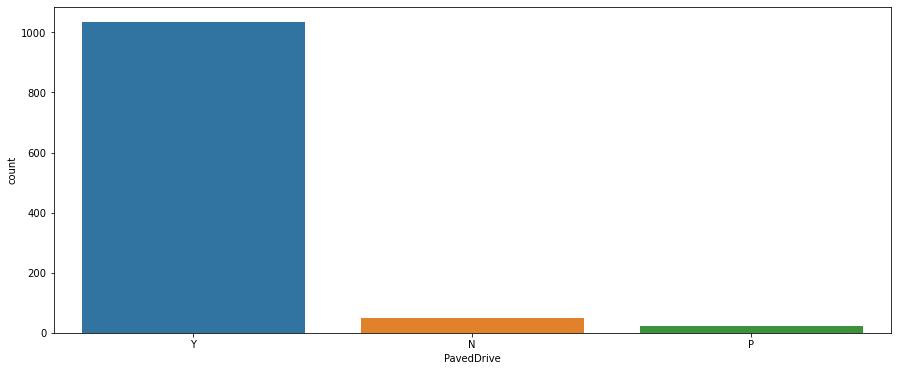

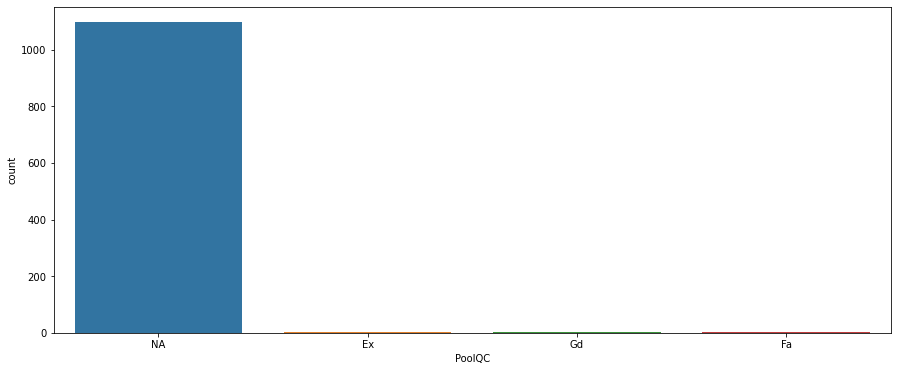

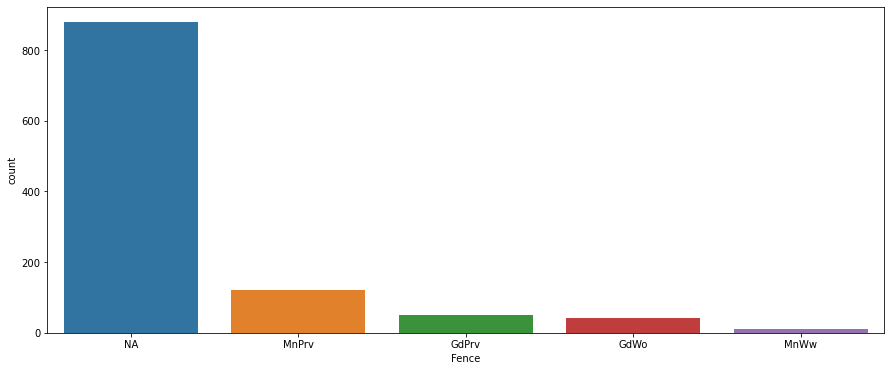

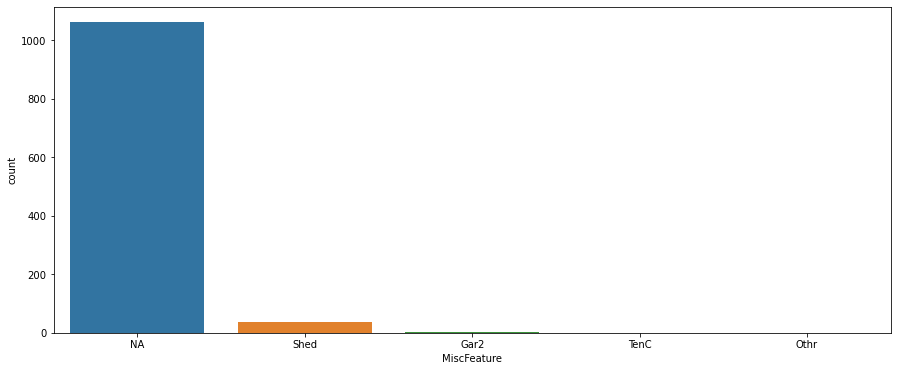

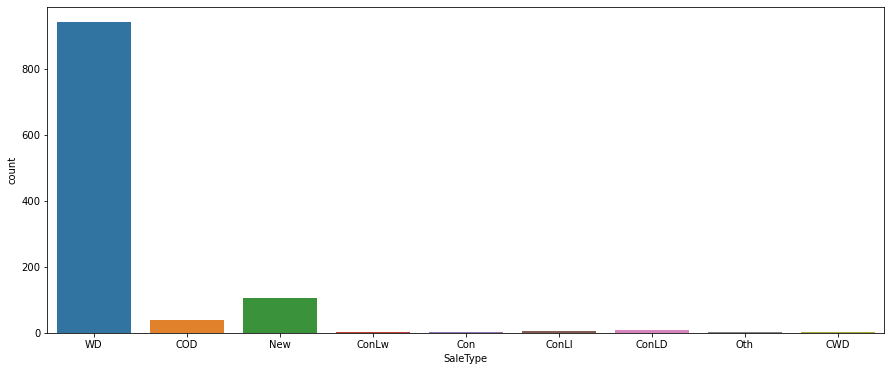

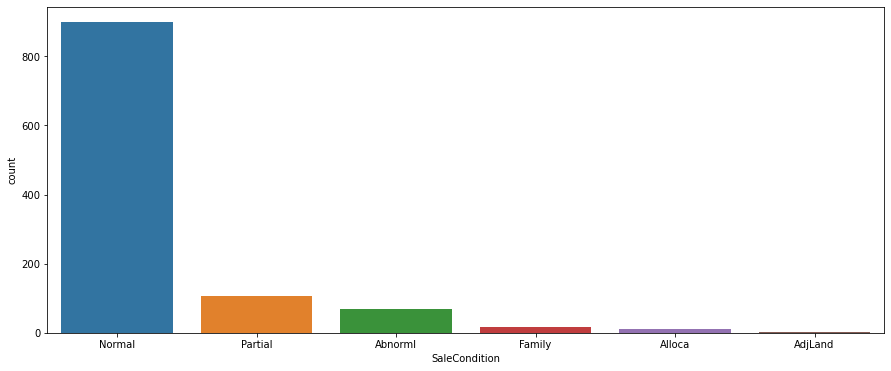

In [71]:
for i in cat_List:
    plt.figure(figsize=(15,6))
    sn.countplot(df_train[i])
    plt.show()

# Observation on UNI-VARIATE ANALYSIS :

    1.On considering the Zone of the house located we could infer that the Residential Low Density zones have higher sales.
    2.90% of the houses have paved road access.
    3.Many houses doesnt have an Alley access.
    4.Most of the plot shapes of the houses are Regular and Slightly irregular. Only a handful of the property have a irregular 
    lot shape.
    5.Around 90% of the lot has a Flat Landcontour.
    6.Also most of the Lot configuration are Inside Lot.
    7.The slope of most property are Gentle.
    8.The NWAmes and college creek are the most common neighborhood.
    9.Most houses have the proximity to various conditions as normal.
    10.Single family detached is the most common form of house found in the data-set.
    11.One story, Two story are known to be the common house style followed by One and one-half story: 2nd level finished.
    12.Gable is found to be the roof style for most of the houses followed by Hip.
    13.Standard (Composite) Shingle is the most common material used for roofing.
    14.Exterior condition of the most houses are Average / Typical.
    15.Cinder Block and Poured Contrete are the common type of foundation used followed by Brick & Tile.
    16.The height of the basement for most houses are found to be Good and Typical.
    17.Also most basements seems to have slight dampness.
    18.Most of the basement have no exposure.
    19.More than 95% of the houses have Gas forced warm air furnace Type of heating.
    20.Most heating equipments in the houses are found to be excellent to average.
    21.90% of houses have Central air conditioning.
    22.Standard Circuit Breakers & Romex is found to be the most common Electrical system.
    23.Most houses have excellent kitchen condition.
    24.Most houses have Typical Home functionality.
    25.Most of the houses dont have a fire place.
    26.Many houses have a attached garage.
    27.Also many garages seems to be unfinished.
    28.Garage quality of most houses seems to be typical.
    29.Paved driveway is the most commn drive way.
    30.Almost 95% of the houses dont have a Pool.
    31.Many houses dont have a Fence.
    32.Many dont have any of the following features Elevator,2nd Garage,Other,Shed,Tennis Court.
    33.Most of the houses are sold by Warranty Deed - Conventional, followed by new homes and Court Officer Deed.
    34.Most of the houses are sold under Normal condition. but some of them are sold in partial construction and abnormal 
    conditions such as trade, foreclosure, short sale.

# BI-VARIATE ANALYSIS : 

<Figure size 1440x1080 with 0 Axes>

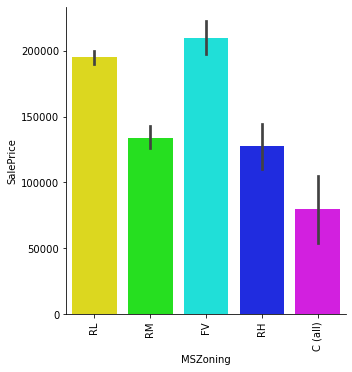

<Figure size 1440x1080 with 0 Axes>

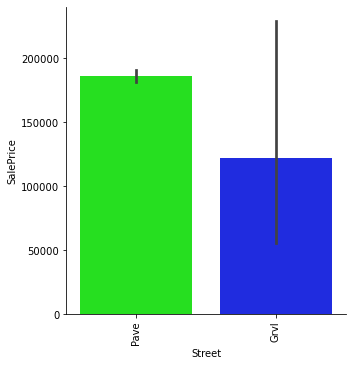

<Figure size 1440x1080 with 0 Axes>

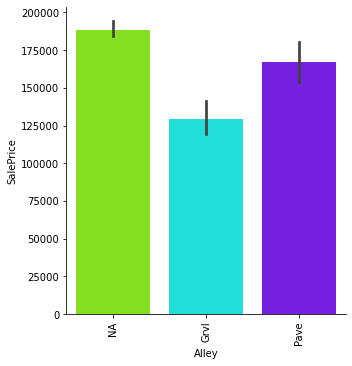

<Figure size 1440x1080 with 0 Axes>

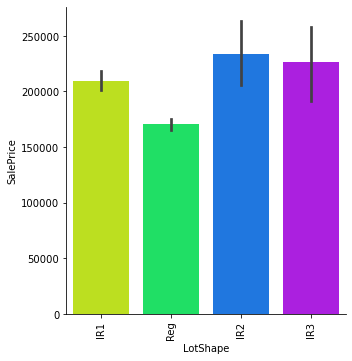

<Figure size 1440x1080 with 0 Axes>

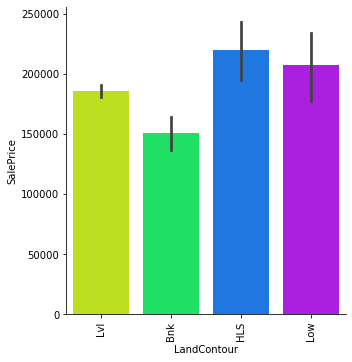

<Figure size 1440x1080 with 0 Axes>

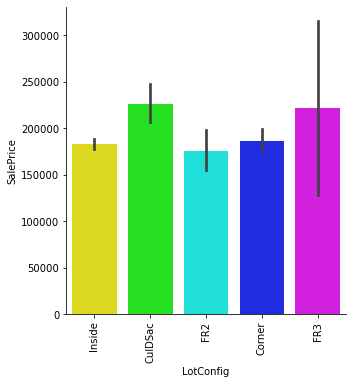

<Figure size 1440x1080 with 0 Axes>

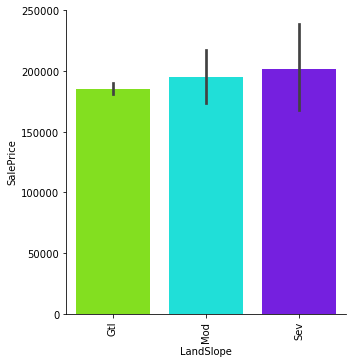

<Figure size 1440x1080 with 0 Axes>

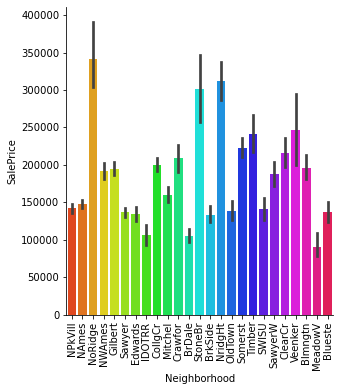

<Figure size 1440x1080 with 0 Axes>

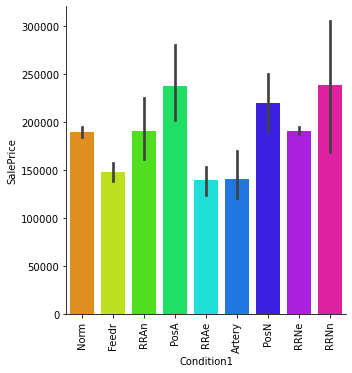

<Figure size 1440x1080 with 0 Axes>

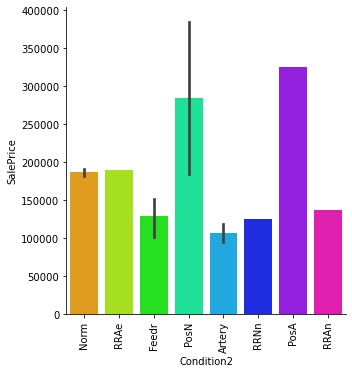

<Figure size 1440x1080 with 0 Axes>

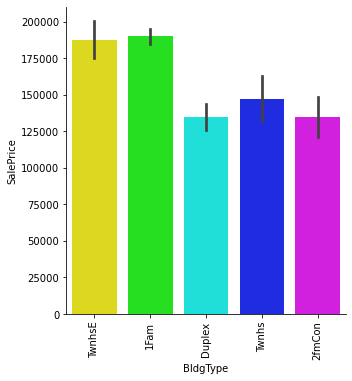

<Figure size 1440x1080 with 0 Axes>

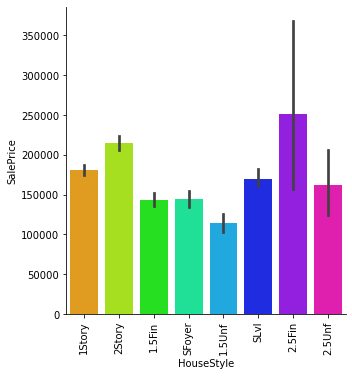

<Figure size 1440x1080 with 0 Axes>

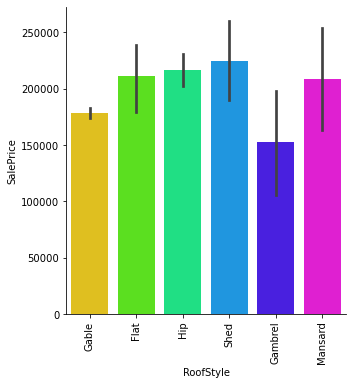

<Figure size 1440x1080 with 0 Axes>

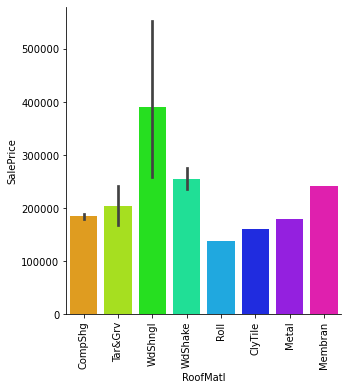

<Figure size 1440x1080 with 0 Axes>

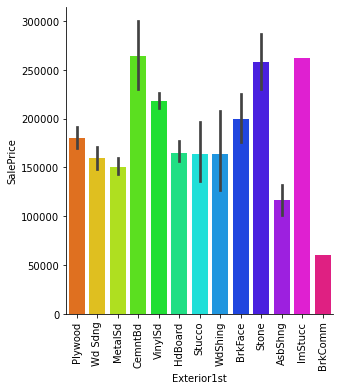

<Figure size 1440x1080 with 0 Axes>

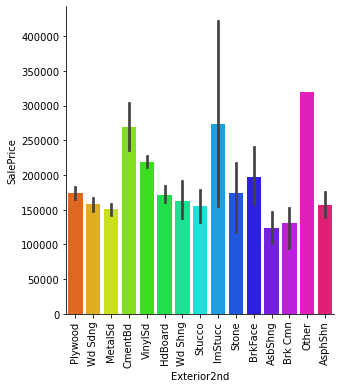

<Figure size 1440x1080 with 0 Axes>

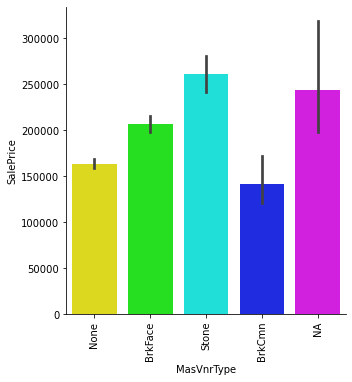

<Figure size 1440x1080 with 0 Axes>

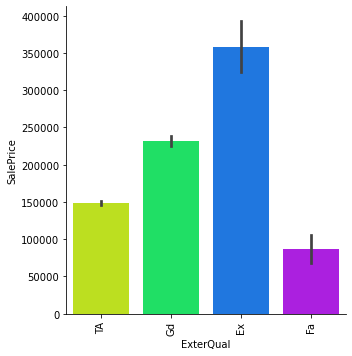

<Figure size 1440x1080 with 0 Axes>

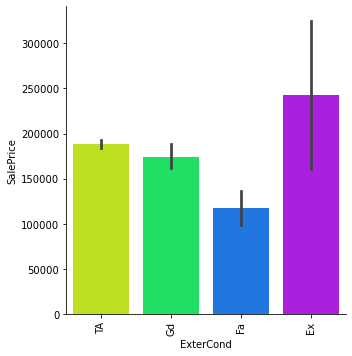

<Figure size 1440x1080 with 0 Axes>

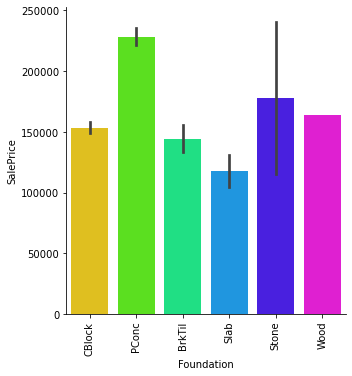

<Figure size 1440x1080 with 0 Axes>

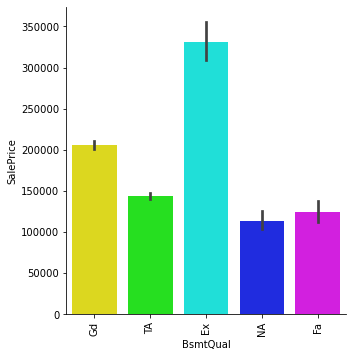

<Figure size 1440x1080 with 0 Axes>

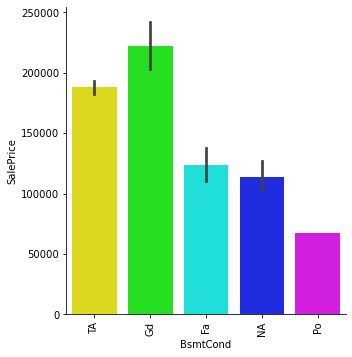

<Figure size 1440x1080 with 0 Axes>

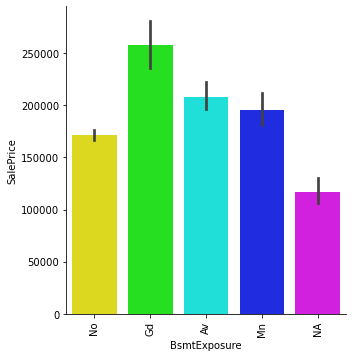

<Figure size 1440x1080 with 0 Axes>

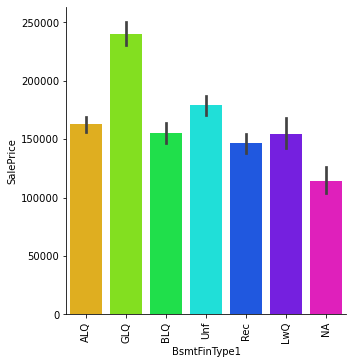

<Figure size 1440x1080 with 0 Axes>

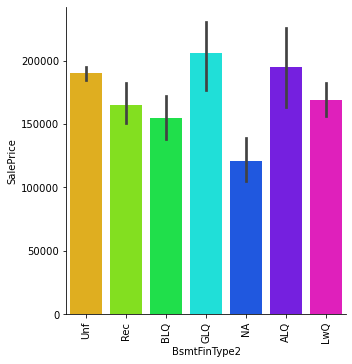

<Figure size 1440x1080 with 0 Axes>

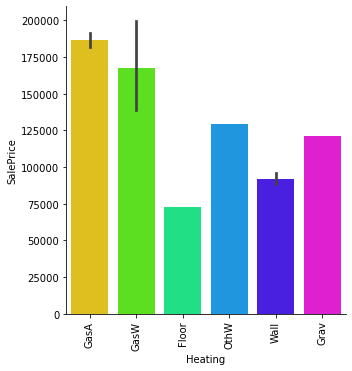

<Figure size 1440x1080 with 0 Axes>

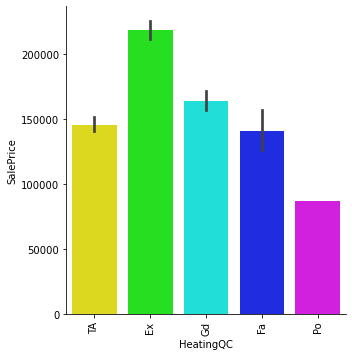

<Figure size 1440x1080 with 0 Axes>

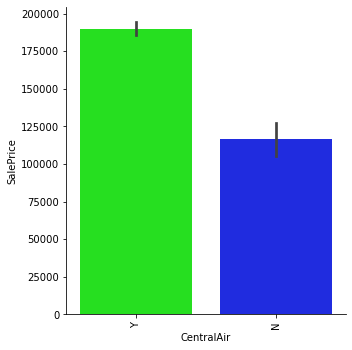

<Figure size 1440x1080 with 0 Axes>

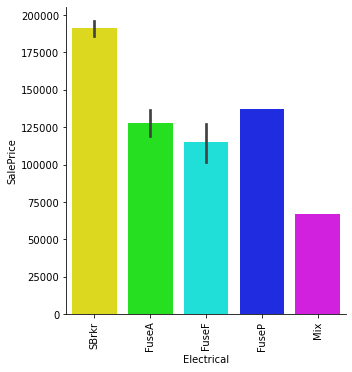

<Figure size 1440x1080 with 0 Axes>

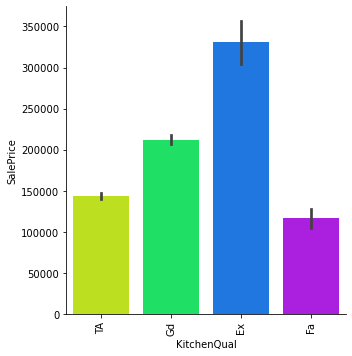

<Figure size 1440x1080 with 0 Axes>

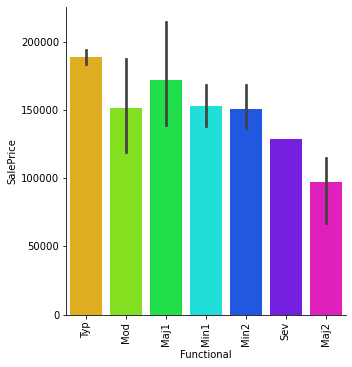

<Figure size 1440x1080 with 0 Axes>

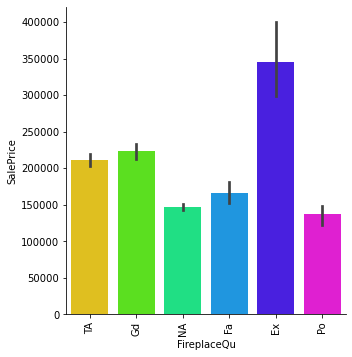

<Figure size 1440x1080 with 0 Axes>

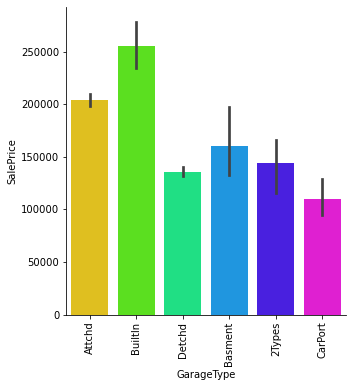

<Figure size 1440x1080 with 0 Axes>

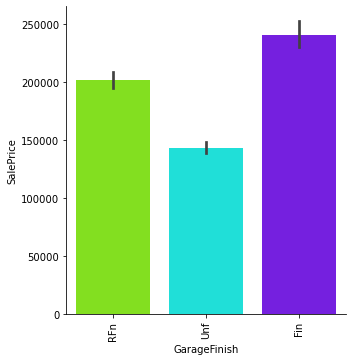

<Figure size 1440x1080 with 0 Axes>

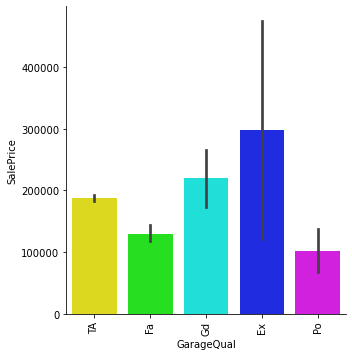

<Figure size 1440x1080 with 0 Axes>

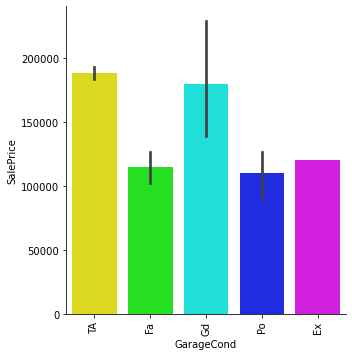

<Figure size 1440x1080 with 0 Axes>

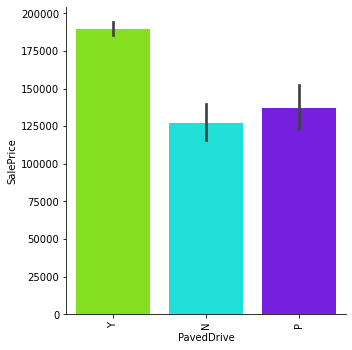

<Figure size 1440x1080 with 0 Axes>

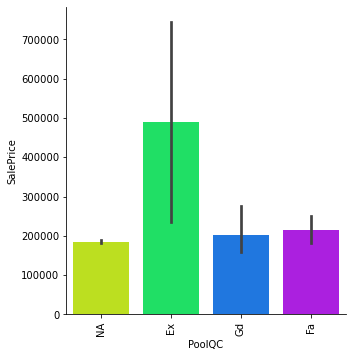

<Figure size 1440x1080 with 0 Axes>

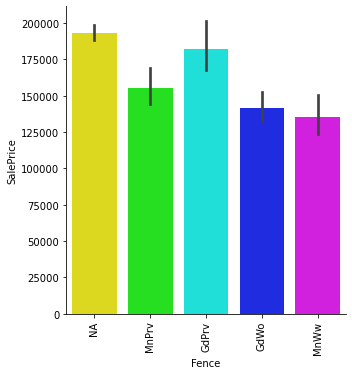

<Figure size 1440x1080 with 0 Axes>

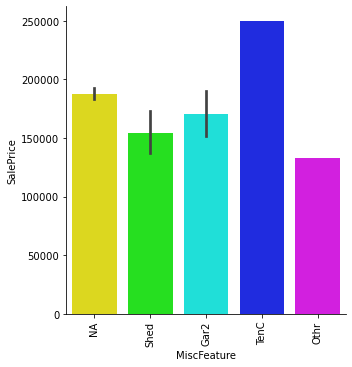

<Figure size 1440x1080 with 0 Axes>

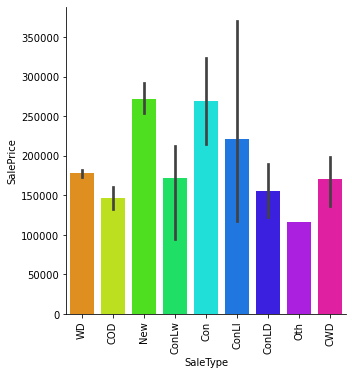

<Figure size 1440x1080 with 0 Axes>

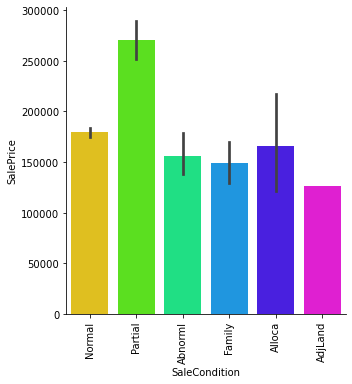

In [72]:
for i in cat_List:
    plt.figure(figsize=(20,15))
    sn.catplot(y='SalePrice',x=i,data=df_train,kind="bar",palette="hsv")
    plt.xticks(rotation=90)
    plt.show()

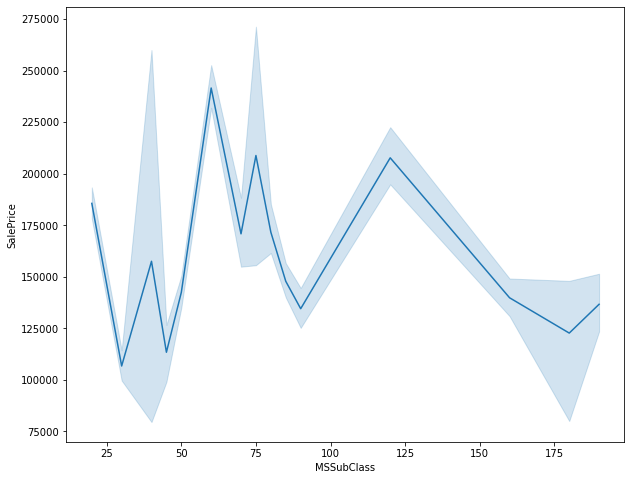

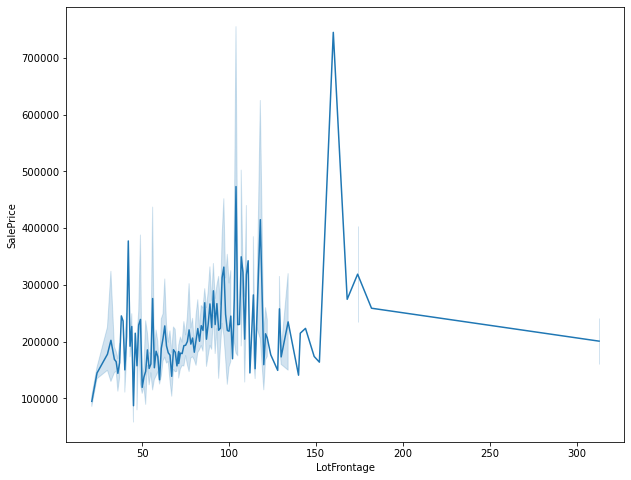

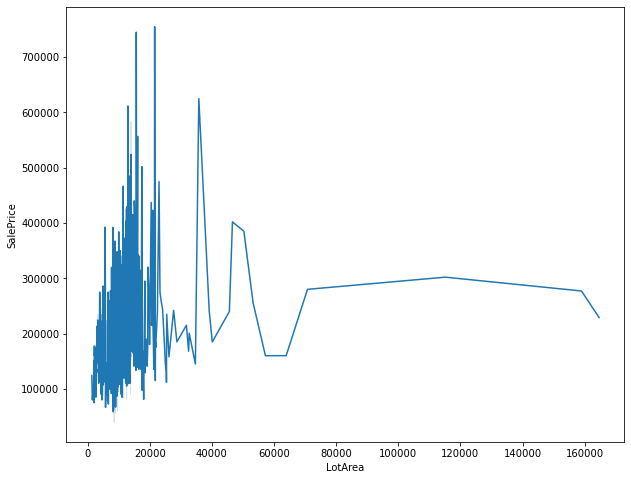

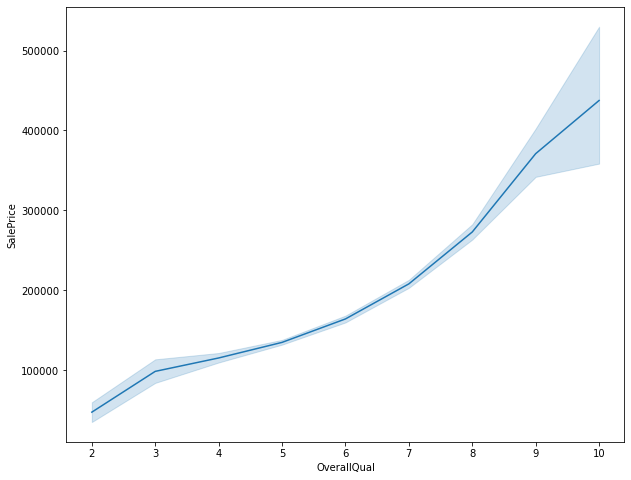

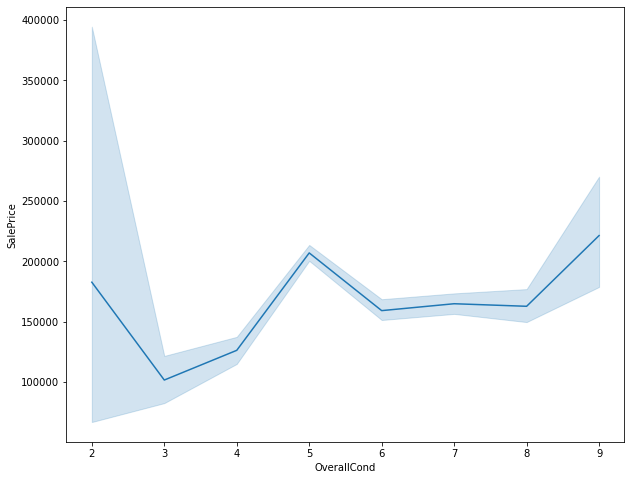

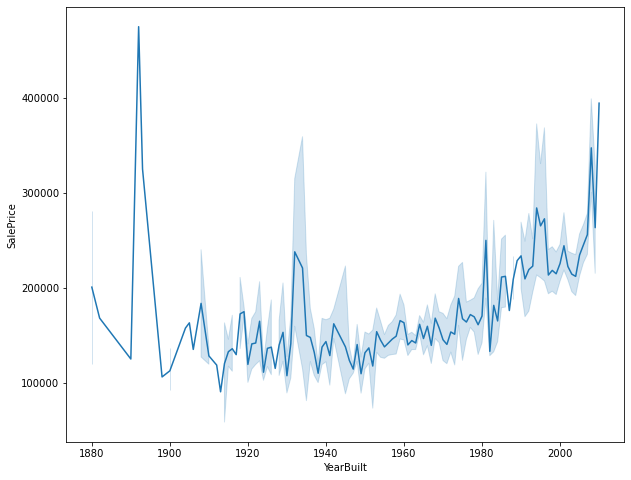

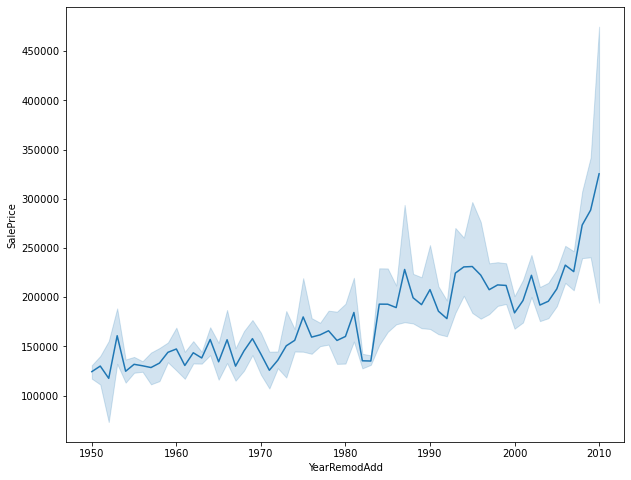

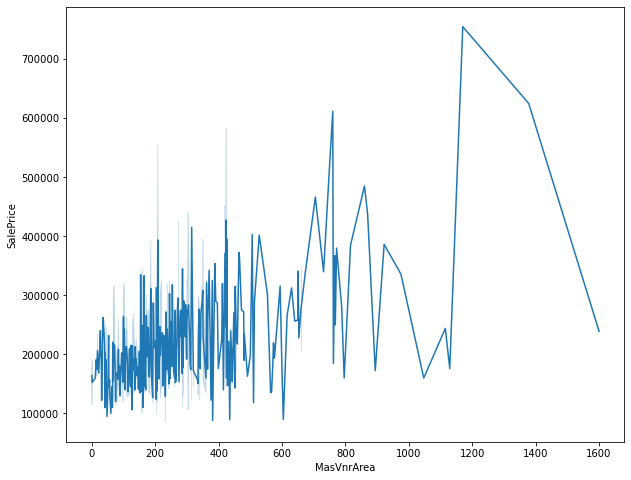

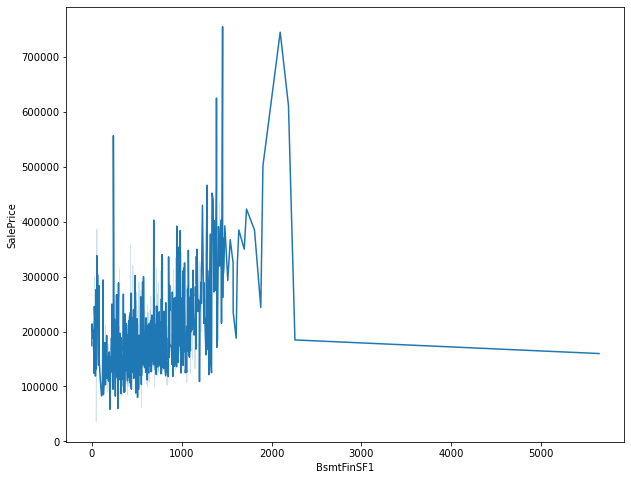

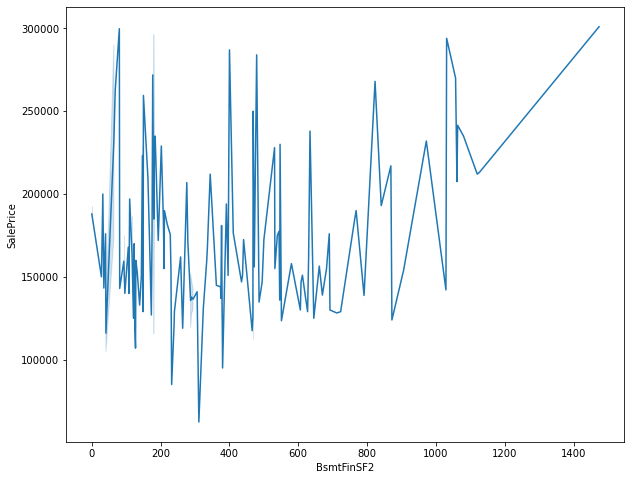

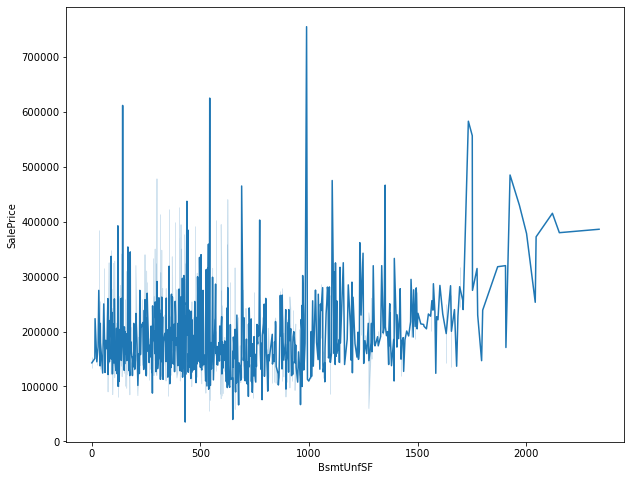

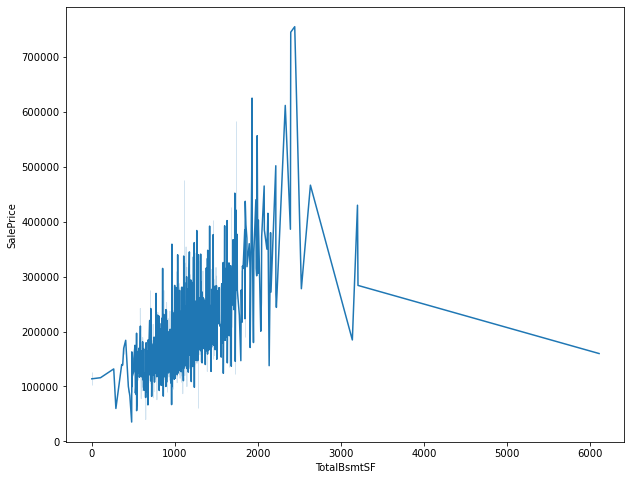

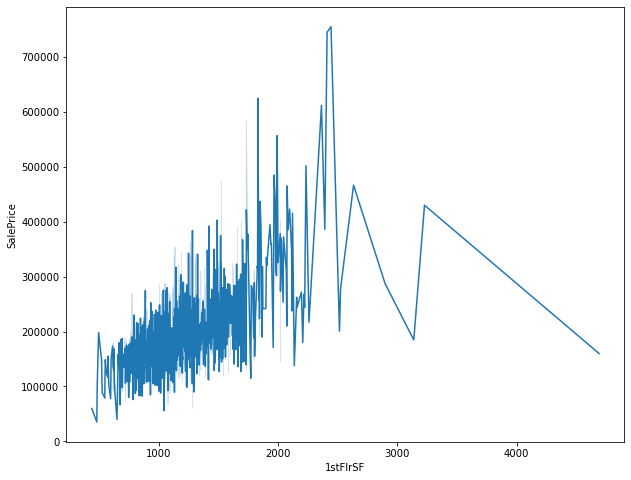

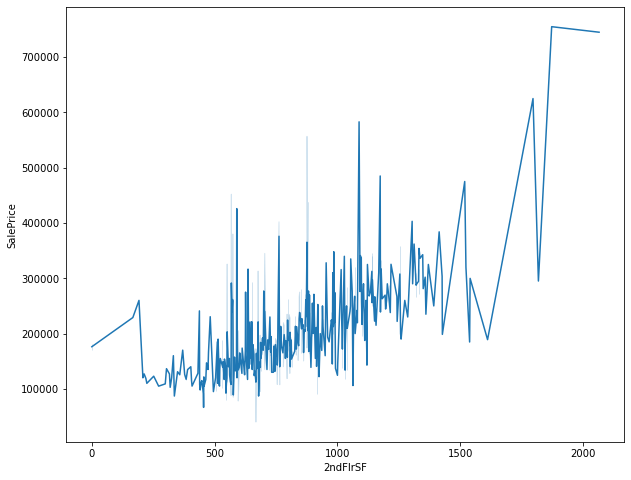

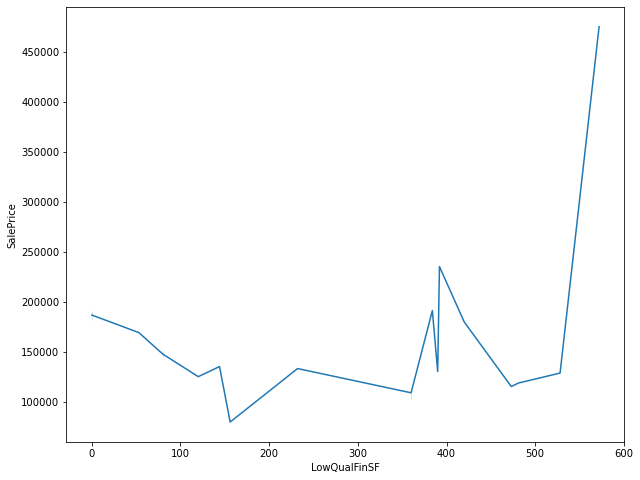

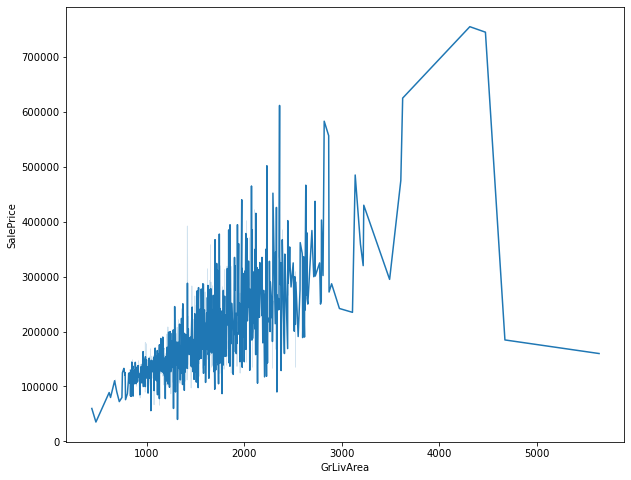

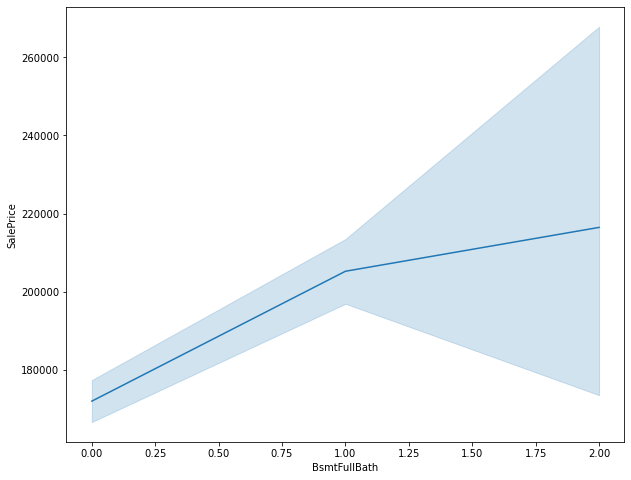

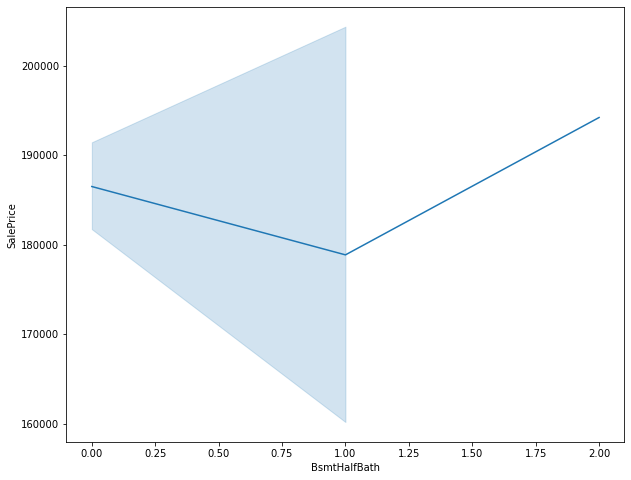

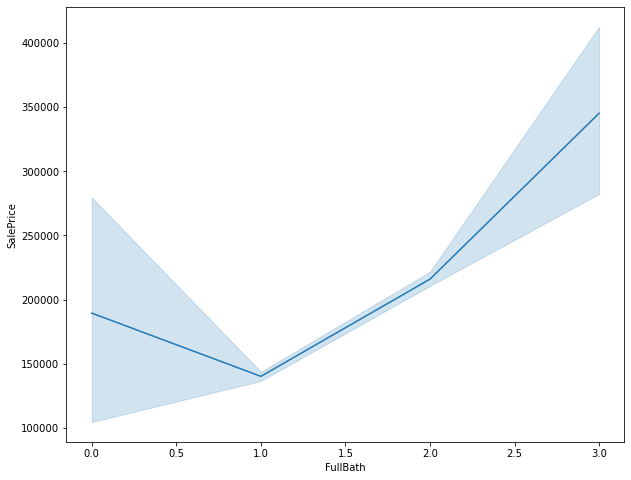

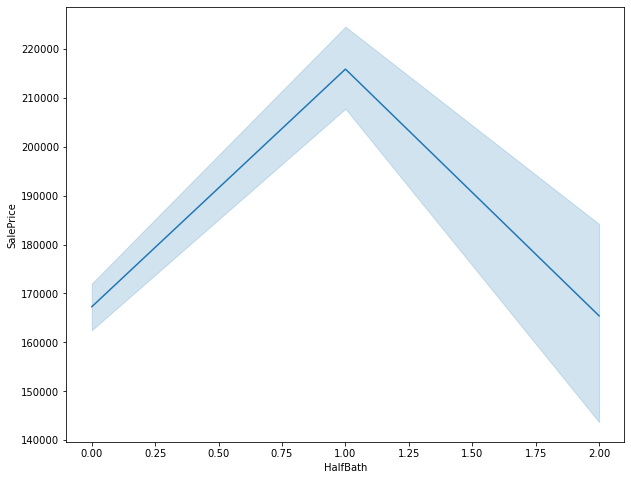

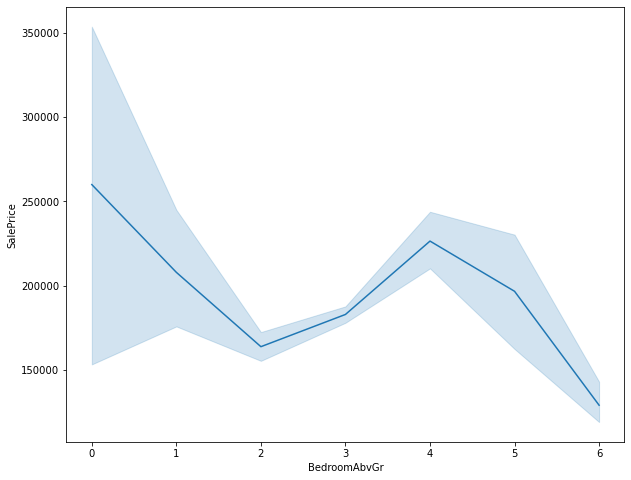

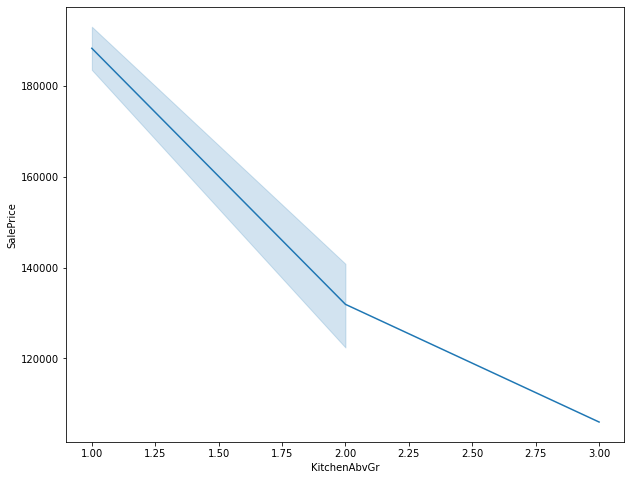

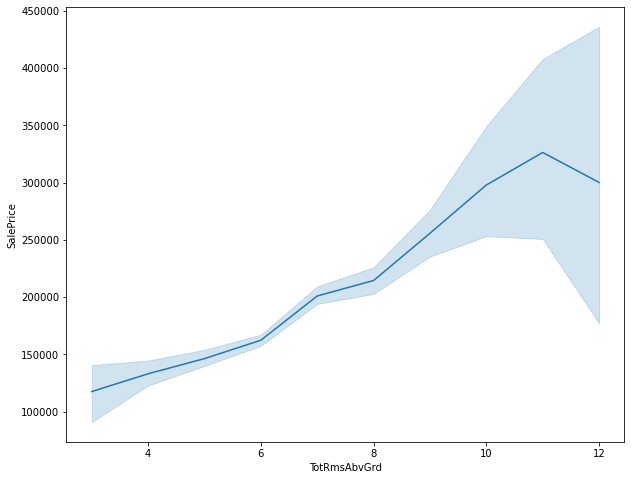

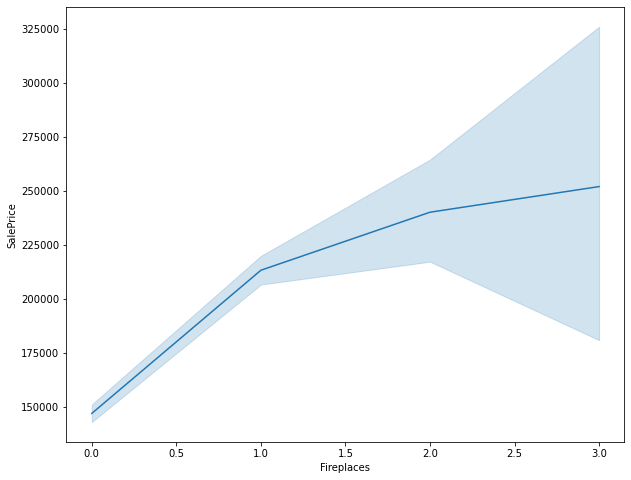

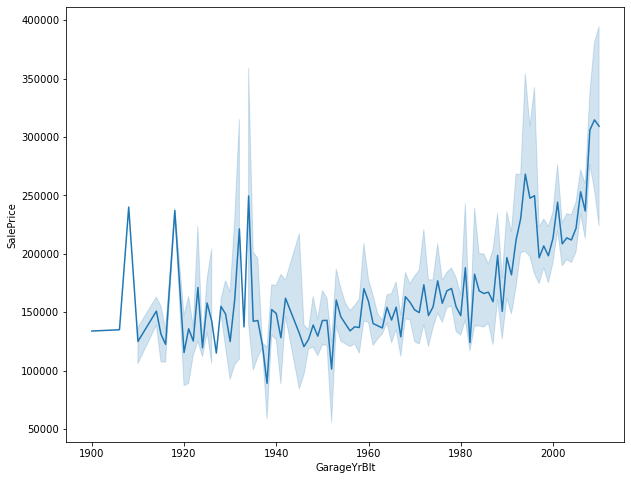

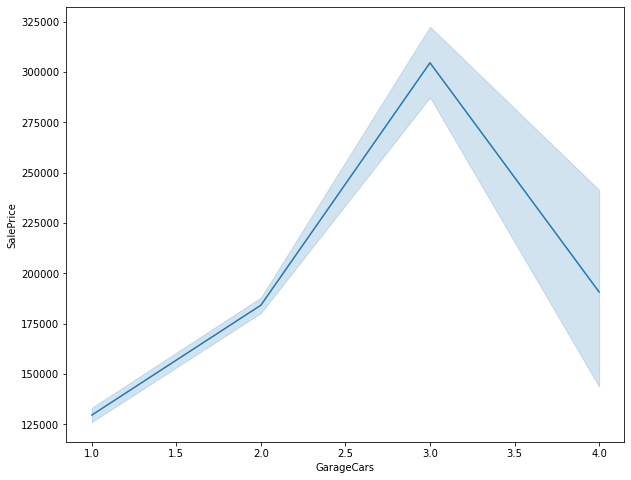

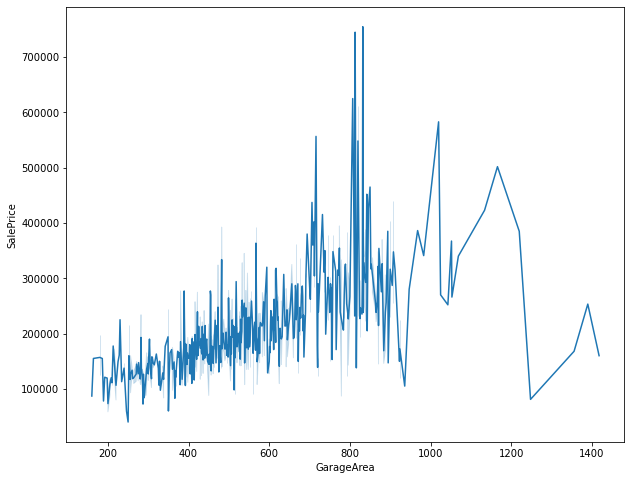

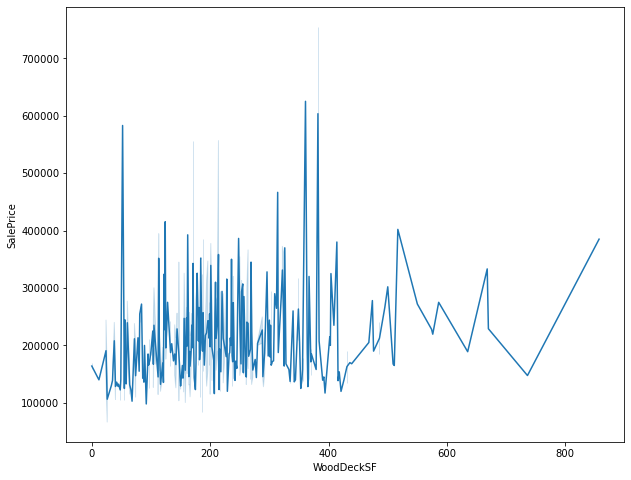

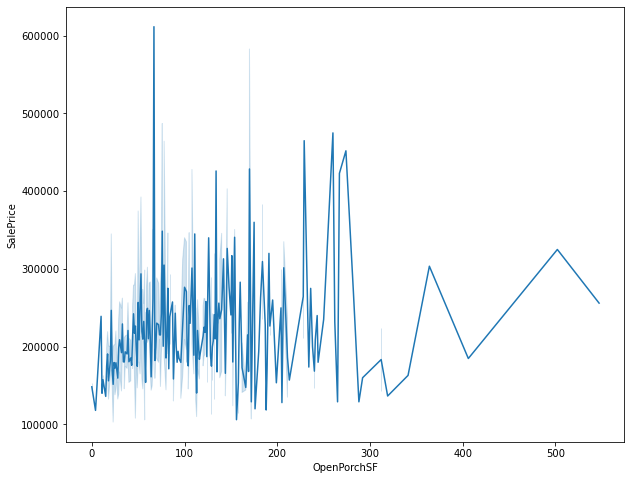

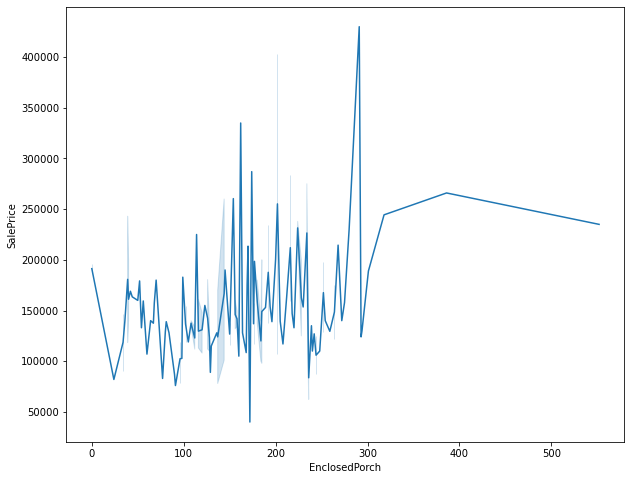

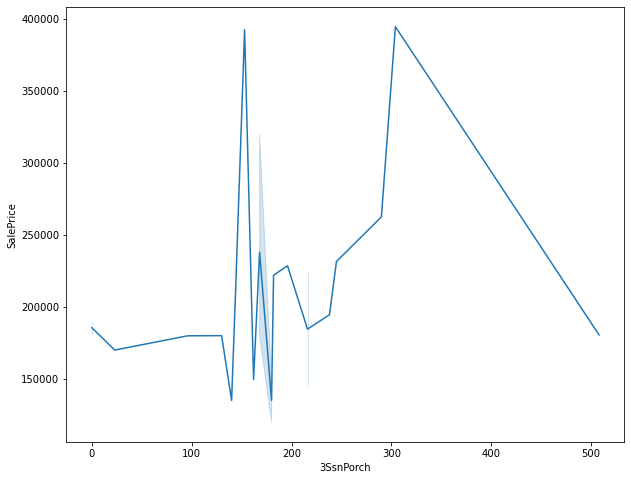

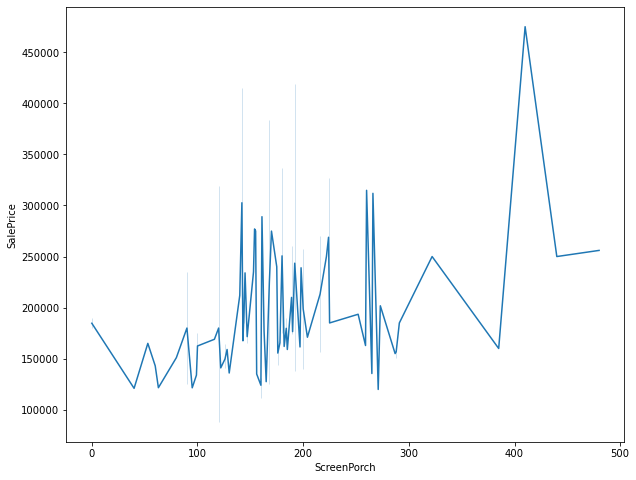

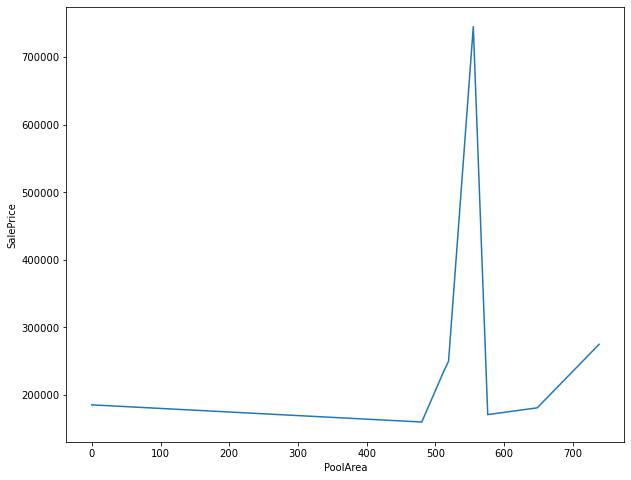

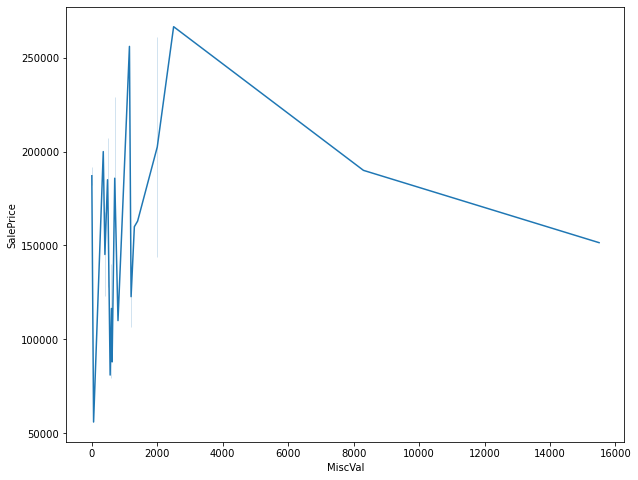

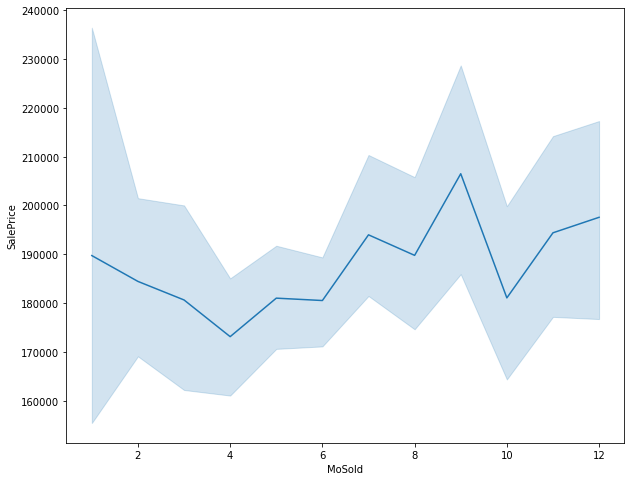

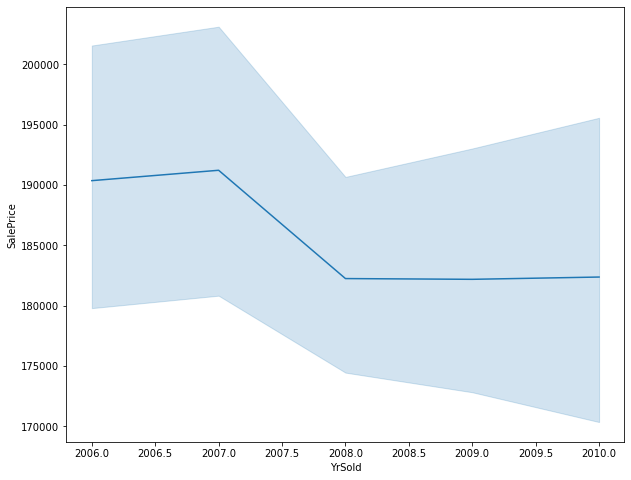

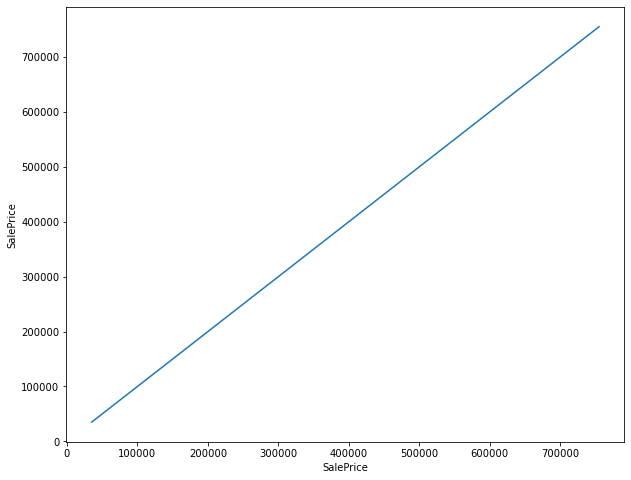

In [73]:
for i in num_List:
    plt.figure(figsize=(10,8))
    sn.lineplot(y='SalePrice',x=i,data=df_train)
    plt.show()

# Observation on BI-VARIATE ANALYSIS :

    1.2-STORY 1946 & NEWER, 2-STORY 1945 & OLDER is known to be the popular houses selling at higher price followed by 1-STORY 
    PUD (Planned Unit Development) - 1946 & NEWER.
    2.Lots between 150-200 linear feet seems to have higher sales price.
    3.Price of the houses increses with the overall material and finish of the house.
    4.Houses built between 1880-1900 and 1980-2006 seems to have higher sales price.
    5.Houses with garage of 3 car capacity seems to have higher sales price and are selling more in numbers.
    6.Most expected garage area is 600-900 sqft.
    7.Houses with openporch sells quickly.
    8.Also enclosed Porch seems to have higher sales price.


# Feature Engineering:

# Now we will use Label Encoder to change catagorical values to Numerical values.

# LabelEncoder

In [74]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_List:
    df_train[i] = le.fit_transform(df_train[i].astype(str))
print (df_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1104 entries, 0 to 1167
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1104 non-null   int64  
 1   MSZoning       1104 non-null   int32  
 2   LotFrontage    1104 non-null   float64
 3   LotArea        1104 non-null   int64  
 4   Street         1104 non-null   int32  
 5   Alley          1104 non-null   int32  
 6   LotShape       1104 non-null   int32  
 7   LandContour    1104 non-null   int32  
 8   LotConfig      1104 non-null   int32  
 9   LandSlope      1104 non-null   int32  
 10  Neighborhood   1104 non-null   int32  
 11  Condition1     1104 non-null   int32  
 12  Condition2     1104 non-null   int32  
 13  BldgType       1104 non-null   int32  
 14  HouseStyle     1104 non-null   int32  
 15  OverallQual    1104 non-null   int64  
 16  OverallCond    1104 non-null   int64  
 17  YearBuilt      1104 non-null   int64  
 18  YearRemo

In [75]:
df_train.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,3,70.98847,4928,1,1,0,3,4,0,13,2,2,4,2,6,5,1976,1976,1,1,7,9,3,0.0,3,3,1,2,4,4,0,120,6,0,958,1078,1,4,1,4,958,0,0,958,0,0,2,0,2,1,3,5,6,1,5,1,1977.0,1,2,440,4,4,2,0,205,0,0,0,0,3,4,1,0,2,2007,8,4,128000
1,20,3,95.00000,15865,1,1,0,3,4,1,12,2,2,0,2,8,6,1970,1970,0,5,11,13,3,0.0,2,2,2,4,1,1,0,351,5,823,1043,2217,1,0,1,4,2217,0,0,2217,1,0,2,0,4,1,2,8,6,1,5,1,1970.0,2,2,621,4,4,2,81,207,0,0,224,0,3,4,1,0,10,2007,8,4,268000
2,60,3,92.00000,9920,1,1,0,3,1,0,15,2,2,0,5,7,5,1996,1997,1,1,6,7,3,0.0,2,3,2,2,4,0,2,862,6,0,255,1117,1,0,1,4,1127,886,0,2013,1,0,2,1,3,1,3,8,6,1,5,1,1997.0,2,2,455,4,4,2,180,130,0,0,0,0,3,4,1,0,6,2007,8,4,269790
3,20,3,105.00000,11751,1,1,0,3,4,0,14,2,2,0,2,6,6,1977,1977,3,1,7,9,1,480.0,3,3,1,2,4,4,1,705,6,0,1139,1844,1,0,1,4,1844,0,0,1844,0,0,2,0,3,1,3,7,6,1,5,1,1977.0,1,2,546,4,4,2,0,122,0,0,0,0,3,2,1,0,1,2010,0,4,190000
4,20,3,70.98847,16635,1,1,0,3,2,0,14,2,2,0,2,6,7,1977,2000,1,1,3,4,4,126.0,2,3,1,2,4,4,0,1246,6,0,356,1602,1,2,1,4,1602,0,0,1602,0,1,2,0,3,1,2,8,6,1,5,1,1977.0,0,2,529,4,4,2,240,0,0,0,0,0,3,4,1,0,6,2009,8,4,215000
5,60,3,58.00000,14054,1,1,0,3,4,0,8,2,2,0,5,7,5,2006,2006,1,1,10,12,3,0.0,2,3,2,2,4,0,6,0,6,0,879,879,1,0,1,4,879,984,0,1863,0,0,2,1,4,1,2,9,6,1,2,3,2006.0,0,3,660,4,4,2,100,17,0,0,0,0,3,4,1,0,11,2006,6,5,219210
6,20,3,70.98847,11341,1,1,0,3,4,0,19,2,2,0,2,5,6,1957,1996,3,1,11,13,1,180.0,3,3,1,2,4,4,0,1302,6,0,90,1392,1,4,1,4,1392,0,0,1392,1,0,1,1,3,1,3,5,4,1,2,5,1957.0,2,2,528,4,4,2,0,0,0,0,95,0,3,4,1,0,5,2010,8,4,121500
7,20,3,88.00000,13125,1,1,3,3,0,0,19,2,2,0,2,5,4,1957,2000,1,1,11,13,0,67.0,3,3,1,4,4,4,5,168,1,682,284,1134,1,0,1,4,1803,0,0,1803,1,0,2,0,3,1,3,8,0,1,5,1,1957.0,1,2,484,4,4,2,0,0,0,0,0,0,3,0,1,0,1,2006,8,4,155000
8,20,3,70.00000,9170,1,1,3,3,0,0,7,1,2,0,2,5,7,1965,1965,3,1,6,7,3,0.0,3,3,1,4,4,4,0,698,2,96,420,1214,1,0,1,4,1214,0,0,1214,1,0,1,0,2,1,3,6,6,0,3,5,1965.0,2,2,461,1,1,2,0,0,184,0,0,0,3,0,3,400,4,2007,8,4,140000
9,50,3,80.00000,8480,1,1,3,3,4,0,12,2,2,0,0,5,5,1947,1950,1,1,6,7,3,0.0,3,3,1,4,4,4,5,442,6,0,390,832,1,4,1,4,832,384,0,1216,0,0,1,0,2,1,3,6,6,0,3,5,1947.0,2,1,336,4,4,2,158,0,102,0,0,0,3,4,1,0,10,2008,0,0,118500


# PLOTTING THE OUTLIERS

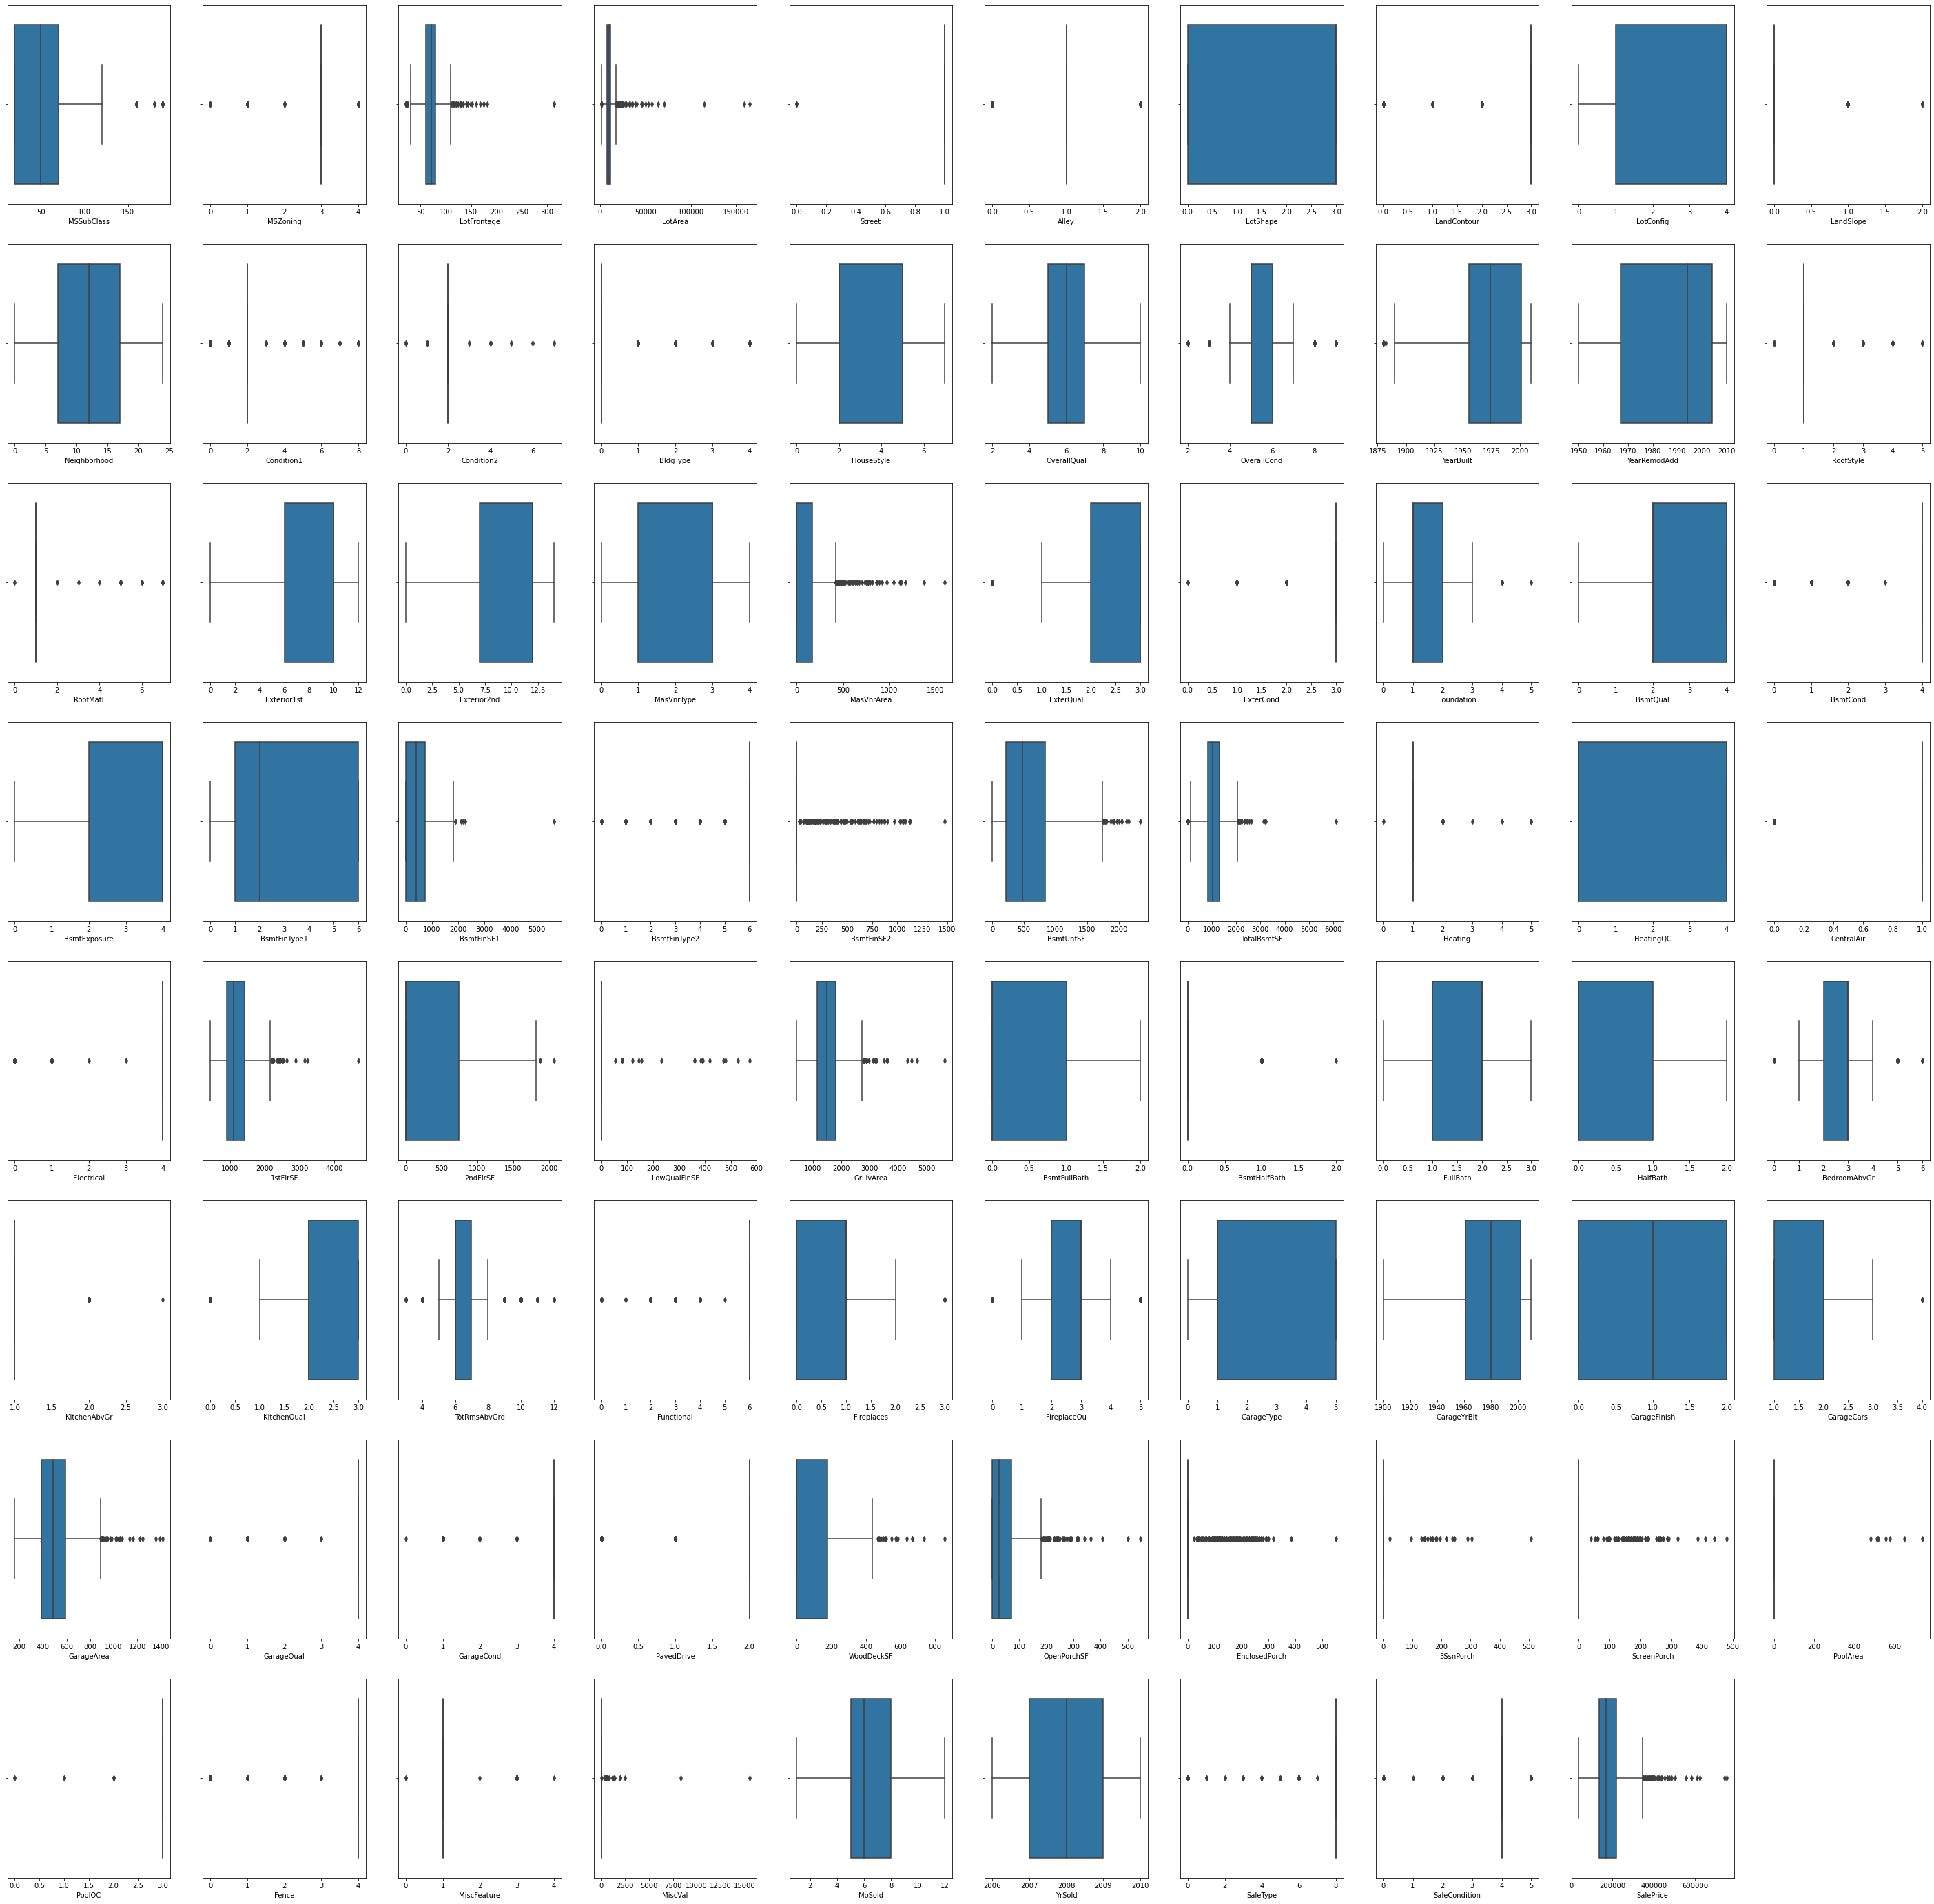

In [76]:
collist=df_train.columns.values
ncol=10
nrow=8
plt.figure(figsize=(50,50))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sn.boxplot(df_train[collist[i]])

# IMPLEMENTING Z-SCORE

In [77]:
from scipy.stats import zscore
z=np.abs(zscore(df_train))
z

array([[1.57885081, 0.01307876, 0.02508591, ..., 0.33391033, 0.17872688,
        0.73949875],
       [0.88291219, 0.01307876, 1.0469149 , ..., 0.33391033, 0.17872688,
        1.04326135],
       [0.10179301, 0.01307876, 0.91297915, ..., 0.33391033, 0.17872688,
        1.06605521],
       ...,
       [2.56355601, 0.01307876, 2.12289795, ..., 0.33391033, 0.17872688,
        0.47845174],
       [0.34796931, 4.8260613 , 0.96212141, ..., 0.33391033, 0.17872688,
        1.86009082],
       [0.10179301, 0.01307876, 0.02508591, ..., 0.33391033, 0.17872688,
        0.03658191]])

# NOW WE WILL TRY TO REMOVE THE DATA'S WHICH DOESNT FIT IN THE CONDITION.

In [78]:
threshold=3
print(np.where(z>3))
df_new=df_train[(z<3).all(axis=1)]

(array([   1,    1,    1, ..., 1102, 1102, 1102], dtype=int64), array([ 9, 20, 34, ..., 39, 62, 63], dtype=int64))


In [79]:
print(df_new.shape)
print(df_train.shape)

(432, 79)
(1104, 79)


In [80]:
loss_of_data=(1104-432)/1104*100
loss_of_data

60.86956521739131

# We could see that the data loss during the implimentation of Z-Score is 60%, which is very high. Thus, to prevent the data loss we will eliminate the process of Z-score implimentation.

# Checking the Skewness in the Data-set

In [81]:
df_train.skew()

MSSubClass        1.397477
MSZoning         -1.803386
LotFrontage       2.824855
LotArea          10.509336
Street          -19.131048
Alley             0.000000
LotShape         -0.559712
LandContour      -3.202899
LotConfig        -1.094444
LandSlope         4.883970
Neighborhood      0.018488
Condition1        3.032288
Condition2       11.474149
BldgType          2.367170
HouseStyle        0.270635
OverallQual       0.262337
OverallCond       0.781189
YearBuilt        -0.625816
YearRemodAdd     -0.544449
RoofStyle         1.455139
RoofMatl          7.540345
Exterior1st      -0.527014
Exterior2nd      -0.579306
MasVnrType       -0.498397
MasVnrArea        2.755850
ExterQual        -1.786719
ExterCond        -3.190941
Foundation       -0.029073
BsmtQual         -0.449829
BsmtCond         -2.919927
BsmtExposure     -0.942461
BsmtFinType1      0.138564
BsmtFinSF1        1.878103
BsmtFinType2     -3.109598
BsmtFinSF2        4.263490
BsmtUnfSF         0.908451
TotalBsmtSF       1.871597
H

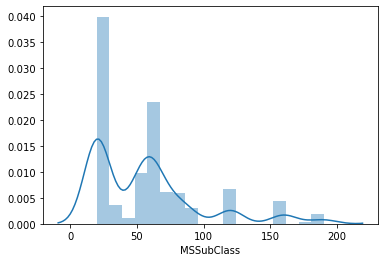

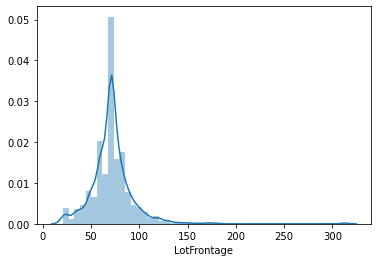

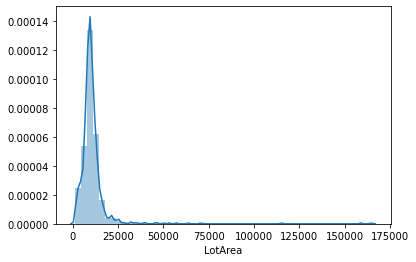

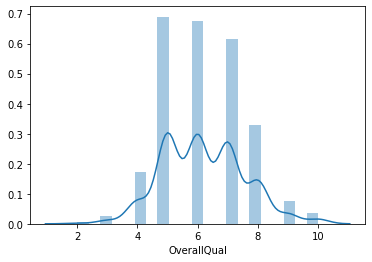

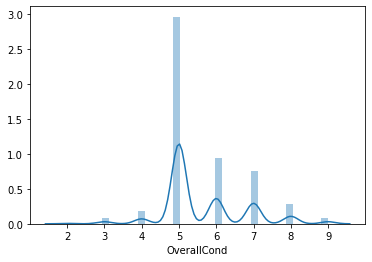

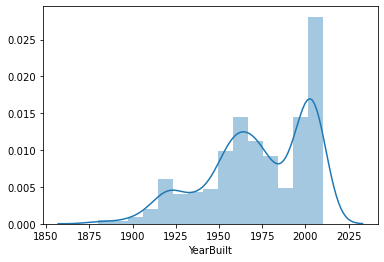

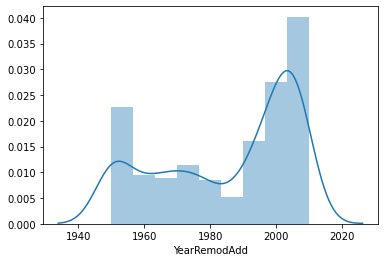

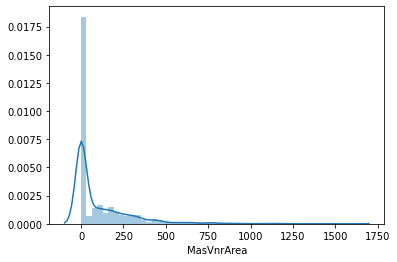

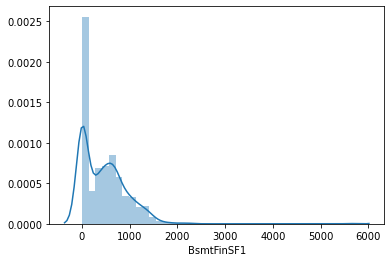

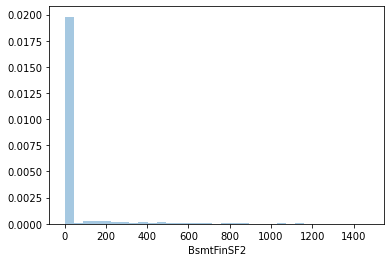

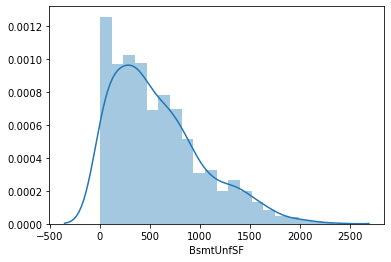

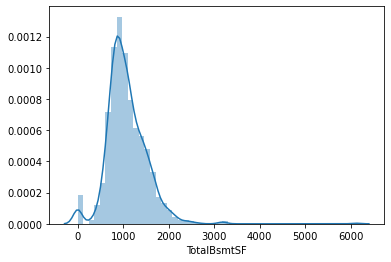

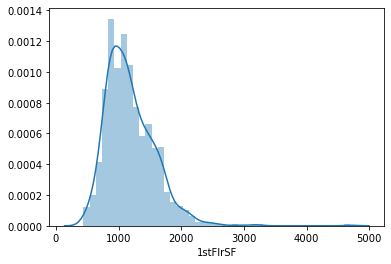

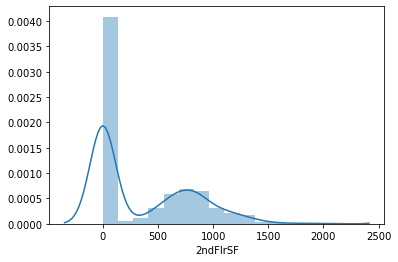

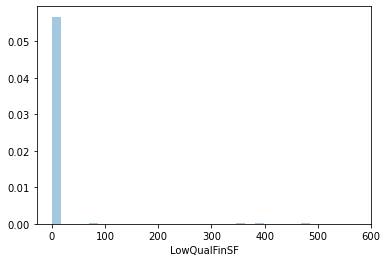

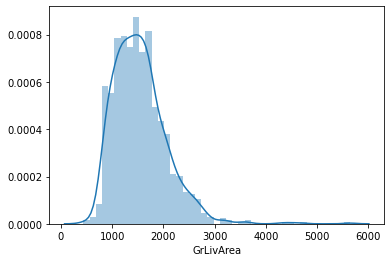

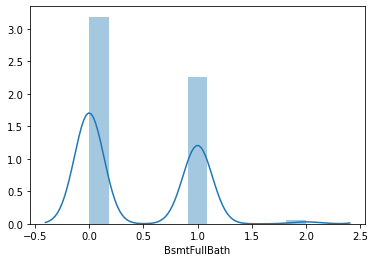

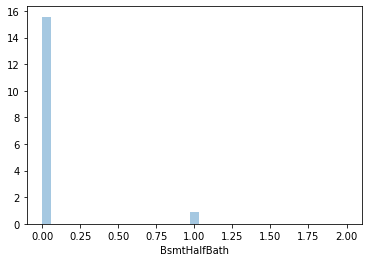

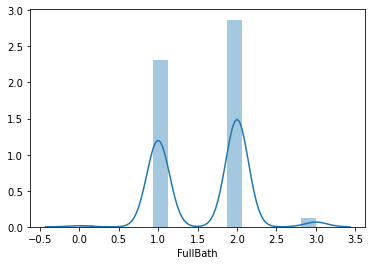

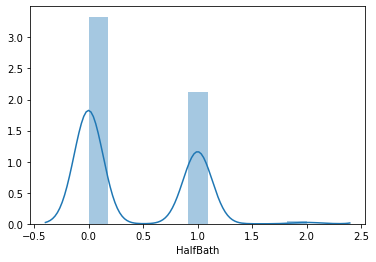

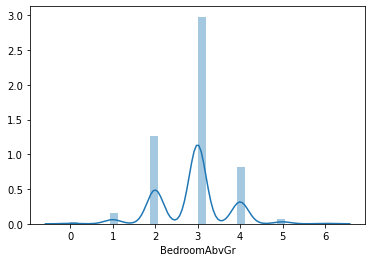

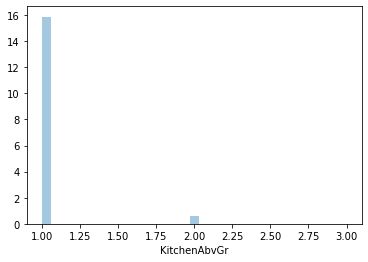

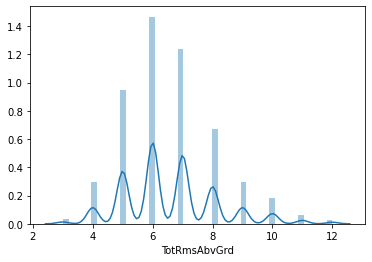

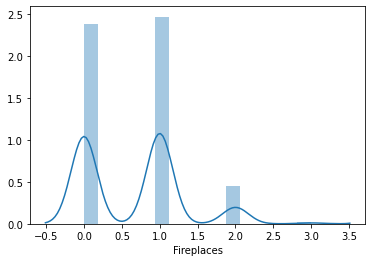

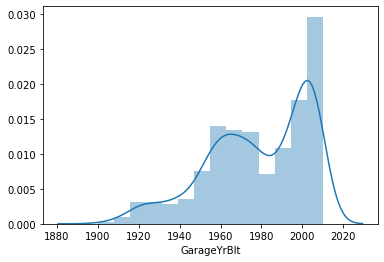

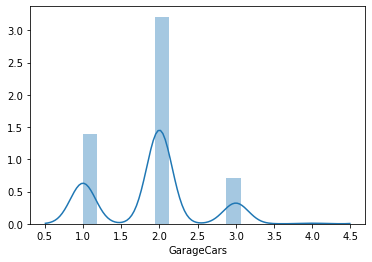

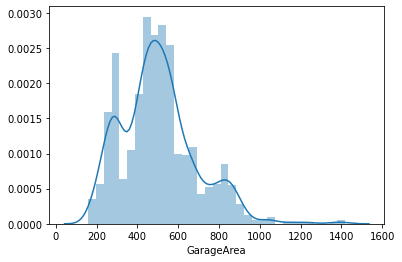

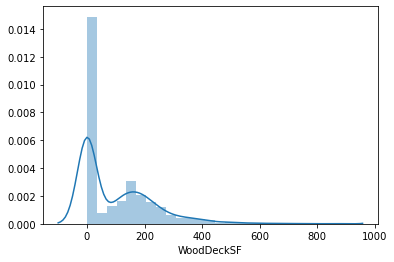

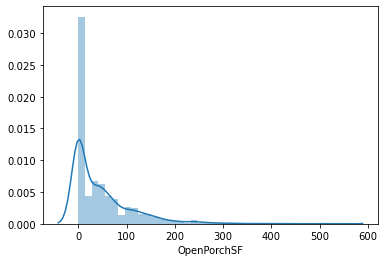

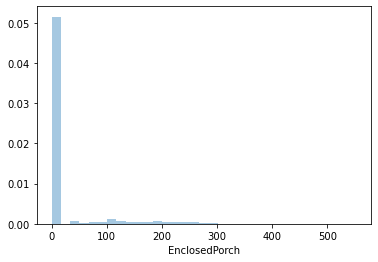

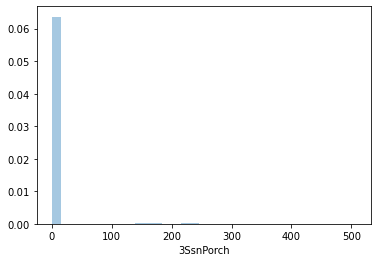

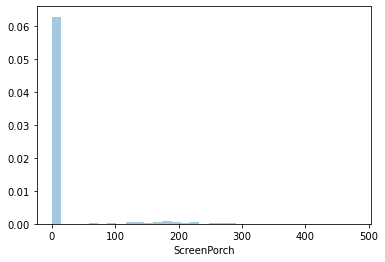

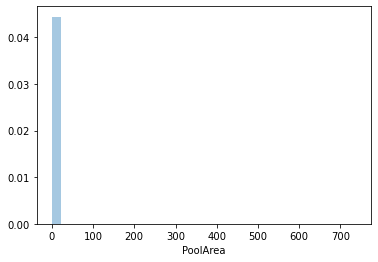

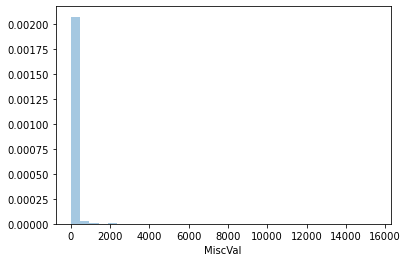

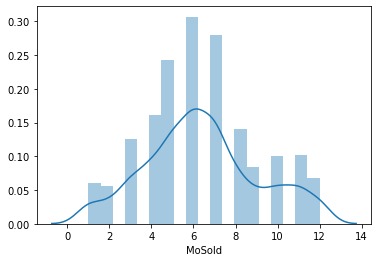

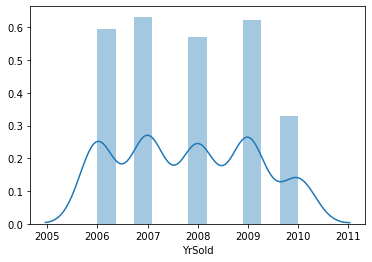

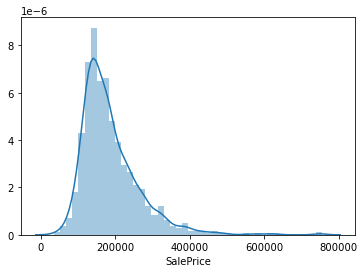

In [82]:
#getting distribution of data in num_list
for i in num_List:
    plt.figure(figsize=(6,4))
    sn.distplot(df_train[i])
    plt.show()

# PREPARING TRAINING DATA-SET FOR TRAINING AND TESTING

In [83]:
x=df_new.drop("SalePrice",axis=1)
y=df_new["SalePrice"]

In [84]:
x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,120,3,70.98847,4928,1,1,0,3,4,0,13,2,2,4,2,6,5,1976,1976,1,1,7,9,3,0.0,3,3,1,2,4,4,0,120,6,0,958,1078,1,4,1,4,958,0,0,958,0,0,2,0,2,1,3,5,6,1,5,1,1977.0,1,2,440,4,4,2,0,205,0,0,0,0,3,4,1,0,2,2007,8,4
2,60,3,92.00000,9920,1,1,0,3,1,0,15,2,2,0,5,7,5,1996,1997,1,1,6,7,3,0.0,2,3,2,2,4,0,2,862,6,0,255,1117,1,0,1,4,1127,886,0,2013,1,0,2,1,3,1,3,8,6,1,5,1,1997.0,2,2,455,4,4,2,180,130,0,0,0,0,3,4,1,0,6,2007,8,4
5,60,3,58.00000,14054,1,1,0,3,4,0,8,2,2,0,5,7,5,2006,2006,1,1,10,12,3,0.0,2,3,2,2,4,0,6,0,6,0,879,879,1,0,1,4,879,984,0,1863,0,0,2,1,4,1,2,9,6,1,2,3,2006.0,0,3,660,4,4,2,100,17,0,0,0,0,3,4,1,0,11,2006,6,5
6,20,3,70.98847,11341,1,1,0,3,4,0,19,2,2,0,2,5,6,1957,1996,3,1,11,13,1,180.0,3,3,1,2,4,4,0,1302,6,0,90,1392,1,4,1,4,1392,0,0,1392,1,0,1,1,3,1,3,5,4,1,2,5,1957.0,2,2,528,4,4,2,0,0,0,0,95,0,3,4,1,0,5,2010,8,4
11,60,3,44.00000,9548,1,1,0,3,1,0,5,2,2,0,5,7,6,2003,2003,1,1,10,12,1,223.0,2,3,2,2,4,4,2,483,6,0,458,941,1,0,1,4,941,888,0,1829,1,0,2,1,3,1,2,7,6,1,5,1,2003.0,1,2,613,4,4,2,192,39,0,0,0,0,3,4,1,0,1,2010,8,4


In [85]:
y.head()

0     128000
2     269790
5     219210
6     121500
11    237000
Name: SalePrice, dtype: int64

# STANDARDISING THE DATA-SET WITH STANDARD SCALER

In [86]:
#USING STANDARD SCALER FOR STANDARDISING THE DATA-SET
from sklearn.preprocessing import StandardScaler
stc=StandardScaler()
x=stc.fit_transform(x)

# PREPARING DATA-SET FOR MODEL TRAINING

In [87]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=42)

In [88]:
x_train.shape

(336, 78)

In [89]:
y_train.shape

(336,)

In [90]:
x_test.shape

(96, 78)

In [91]:
y_test.shape

(96,)

# MACHINE LEARNING MODELS :
# For the above data-set we will use
# 1.LINEAR REGRESSION
# 2.RANDOM FOREST REGRESSOR
# 3.SGD REGRESSOR
# 4.LASSO
# 5.RIDGE
# 6.DecisionTreeRegressor
# 7.KNeighborsRegressor
# 8.AdaBoostRegressor
# 9.GradientBoostingRegressor

In [92]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
r2score=r2_score(y_test,pred)
cvscore=abs(cross_val_score(lr,x,y,cv=10,scoring='r2')).mean()
print( f"Accuracy={r2score*100},\ncross_value_score={cvscore*100}")
mse=mean_squared_error(y_test,pred)
print("Mean_Squared_Error =",mse)

Accuracy=92.06181212557935,
cross_value_score=1.6779585864399245e+18
Mean_Squared_Error = 278691916.7122572


In [93]:
#RANDOM FOREST REGRESSOR
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
r2score=r2_score(y_test,pred)
cvscore=abs(cross_val_score(rf,x,y,cv=10,scoring='r2')).mean()
print( f"Accuracy={r2score*100},\ncross_value_score={cvscore*100}")
mse=mean_squared_error(y_test,pred)
print("Mean_Squared_Error =",mse)

Accuracy=92.2257254871677,
cross_value_score=87.17095890037335
Mean_Squared_Error = 272937287.3637885


In [94]:
#SGD REGRESSOR
from sklearn.linear_model import SGDRegressor
SGD=SGDRegressor()
SGD.fit(x_train,y_train)
pred=SGD.predict(x_test)
r2score=r2_score(y_test,pred)
cvscore=abs(cross_val_score(SGD,x,y,cv=10,scoring='r2')).mean()
print( f"Accuracy={r2score*100},\ncross_value_score={cvscore*100}")
mse=mean_squared_error(y_test,pred)
print("Mean_Squared_Error =",mse)

Accuracy=91.93737670042663,
cross_value_score=85.54106101830634
Mean_Squared_Error = 283060564.53104573


In [95]:
#LASSO
from sklearn.linear_model import Lasso
la=Lasso()
la.fit(x_train,y_train)
pred=la.predict(x_test)
r2score=r2_score(y_test,pred)
cvscore=abs(cross_val_score(la,x,y,cv=10,scoring='r2')).mean()
print( f"Accuracy={r2score*100},\ncross_value_score={cvscore*100}")
mse=mean_squared_error(y_test,pred)
print("Mean_Squared_Error =",mse)

Accuracy=92.08380150355615,
cross_value_score=88.51205615469793
Mean_Squared_Error = 277919919.1238142


In [96]:
#RIDGE
from sklearn.linear_model import Ridge
Ri=Ridge()
Ri.fit(x_train,y_train)
pred=Ri.predict(x_test)
r2score=r2_score(y_test,pred)
cvscore=abs(cross_val_score(Ri,x,y,cv=10,scoring='r2')).mean()
print( f"Accuracy={r2score*100},\ncross_value_score={cvscore*100}")
mse=mean_squared_error(y_test,pred)
print("Mean_Squared_Error =",mse)

Accuracy=92.12978875507656,
cross_value_score=88.56042590959768
Mean_Squared_Error = 276305410.18634605


In [97]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor(random_state=3)
DTR.fit(x_train,y_train)
pred=DTR.predict(x_test)
r2score=r2_score(y_test,pred)
cvscore=abs(cross_val_score(DTR,x,y,cv=10,scoring='r2')).mean()
print( f"Accuracy={r2score*100},\ncross_value_score={cvscore*100}")
mse=mean_squared_error(y_test,pred)
print("Mean_Squared_Error =",mse)

Accuracy=80.54369299245303,
cross_value_score=69.39586767481046
Mean_Squared_Error = 683067165.6875


In [98]:
#KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor()
KNN.fit(x_train,y_train)
pred=KNN.predict(x_test)
r2score=r2_score(y_test,pred)
cvscore=abs(cross_val_score(KNN,x,y,cv=10,scoring='r2')).mean()
print( f"Accuracy={r2score*100},\ncross_value_score={cvscore*100}")
mse=mean_squared_error(y_test,pred)
print("Mean_Squared_Error =",mse)

Accuracy=82.52188948209538,
cross_value_score=80.33959967354805
Mean_Squared_Error = 613617137.5383333


In [99]:
#AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
AB=AdaBoostRegressor(random_state=3)
AB.fit(x_train,y_train)
pred=AB.predict(x_test)
r2score=r2_score(y_test,pred)
cvscore=abs(cross_val_score(AB,x,y,cv=10,scoring='r2')).mean()
print( f"Accuracy={r2score*100},\ncross_value_score={cvscore*100}")
mse=mean_squared_error(y_test,pred)
print("Mean_Squared_Error =",mse)

Accuracy=88.91221295913786,
cross_value_score=83.11447209192357
Mean_Squared_Error = 389267257.3891082


In [100]:
#GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
GB=GradientBoostingRegressor(random_state=3)
GB.fit(x_train,y_train)
pred=GB.predict(x_test)
r2score=r2_score(y_test,pred)
cvscore=abs(cross_val_score(GB,x,y,cv=10,scoring='r2')).mean()
print( f"Accuracy={r2score*100},\ncross_value_score={cvscore*100}")
mse=mean_squared_error(y_test,pred)
print("Mean_Squared_Error =",mse)

Accuracy=91.44699020812654,
cross_value_score=88.24971351814632
Mean_Squared_Error = 300276930.9903603


# From the above results we could clearly see that the RIDGE REGRESSOR is having a good r2 Score and Cross-validation score.
# So, We will Choose Ridge Regressor as our final Model.

# HYPER PARAMETER TUNING - Ridge

In [101]:
#using GridSearch CV
from sklearn.model_selection import GridSearchCV,KFold
folds  = KFold(n_splits=10,shuffle=True,random_state=42)
params = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}
Model_cv = GridSearchCV(Ri,param_grid=params,scoring='r2',cv=folds,verbose=1,return_train_score=True)
Model_cv.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [102]:
Model_cv.best_params_

{'alpha': 20.0}

In [103]:
ridge = Ridge(alpha=20)
ridge.fit(x_train,y_train)

y_train_pred = ridge.predict(x_train)
print("Train r2 score=",r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(x_test)
print("Test r2 score =",r2_score(y_test,y_test_pred))


Train r2 score= 0.9079598087875739
Test r2 score = 0.9233240226721764


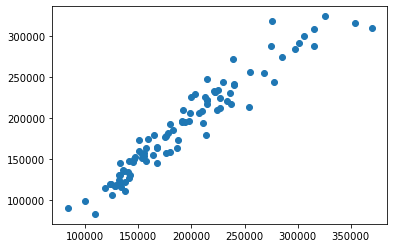

In [104]:
plt.scatter(y_test,y_test_pred)

# We could see that the scatter is a straight line which implies that the model is working properly.

# SAVING THE FINAL MODEL : 

In [105]:
import pickle
filename="Housing_Price_Prediction.pkl"
pickle.dump(ridge,open(filename,"wb"))

# PREDICTION ON THE TEST DATA-SET

# we will now do all the Data pre-processing done for the Training dataset, on the Test Data-set.

In [106]:
#Loading the data-set
dft=pd.read_csv("Housing Project_test_dataset.csv")
df_test=dft.copy()
df_test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
5,650,180,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,4,6,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,131,GLQ,499,0,630,GasA,Gd,Y,SBrkr,630,0,0,630,1,0,1,0,1,1,TA,3,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,12,2007,WD,Normal
6,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SLvl,5,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,80.0,TA,TA,PConc,Gd,TA,Gd,GLQ,547,Unf,0,0,547,GasA,Gd,Y,SBrkr,1072,0,0,1072,1,0,1,0,2,1,TA,5,Typ,0,NaN,Basment,2005.0,Fin,2,525,TA,TA,Y,0,28,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal
7,152,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2007,2008,Hip,CompShg,VinylSd,VinylSd,Stone,436.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1400,Unf,0,310,1710,GasA,Ex,Y,SBrkr,1710,0,0,1710,1,0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2007.0,RFn,3,866,TA,TA,Y,0,102,0,0,0,0,NaN,NaN,NaN,0,1,2008,New,Partial
8,427,80,RL,NaN,12800,Pave,NaN,Reg,Low,AllPub,Inside,Mod,SawyerW,Norm,Norm,1Fam,SLvl,7,5,1989,1989,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,145.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,1518,Unf,0,0,1518,GasA,Gd,Y,SBrkr,1644,0,0,1644,1,1,2,0,2,1,Gd,5,Typ,1,TA,Attchd,1989.0,Fin,2,569,TA,TA,Y,80,0,0,0,396,0,NaN,NaN,NaN,0,8,2009,WD,Normal
9,776,120,RM,32.0,4500,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Mitchel,Norm,Norm,TwnhsE,1Story,6,5,1998,1998,Hip,CompShg,VinylSd,VinylSd,BrkFace,320.0,TA,TA,PConc,Ex,TA,No,GLQ,866,Unf,0,338,1204,GasA,Ex,Y,SBrkr,1204,0,0,1204,1,0,2,0,2,1,TA,5,Typ,0,NaN,Attchd,1998.0,Fin,2,412,TA,TA,

In [107]:
#checking the shape of the data-set
df_test.shape

(292, 80)

In [108]:
#checking all the column names
list(df_test.columns)

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [109]:
#checking the data type and null values of the variables in the data-set
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

# Handling the Null Values :

In [110]:
#checking the null values 
for col in df_test.columns:
    print("\nTitle :",col,"\nNaN val:",df_test[col].isnull().sum())


Title : Id 
NaN val: 0

Title : MSSubClass 
NaN val: 0

Title : MSZoning 
NaN val: 0

Title : LotFrontage 
NaN val: 45

Title : LotArea 
NaN val: 0

Title : Street 
NaN val: 0

Title : Alley 
NaN val: 278

Title : LotShape 
NaN val: 0

Title : LandContour 
NaN val: 0

Title : Utilities 
NaN val: 0

Title : LotConfig 
NaN val: 0

Title : LandSlope 
NaN val: 0

Title : Neighborhood 
NaN val: 0

Title : Condition1 
NaN val: 0

Title : Condition2 
NaN val: 0

Title : BldgType 
NaN val: 0

Title : HouseStyle 
NaN val: 0

Title : OverallQual 
NaN val: 0

Title : OverallCond 
NaN val: 0

Title : YearBuilt 
NaN val: 0

Title : YearRemodAdd 
NaN val: 0

Title : RoofStyle 
NaN val: 0

Title : RoofMatl 
NaN val: 0

Title : Exterior1st 
NaN val: 0

Title : Exterior2nd 
NaN val: 0

Title : MasVnrType 
NaN val: 1

Title : MasVnrArea 
NaN val: 1

Title : ExterQual 
NaN val: 0

Title : ExterCond 
NaN val: 0

Title : Foundation 
NaN val: 0

Title : BsmtQual 
NaN val: 7

Title : BsmtCond 
NaN val: 7

T

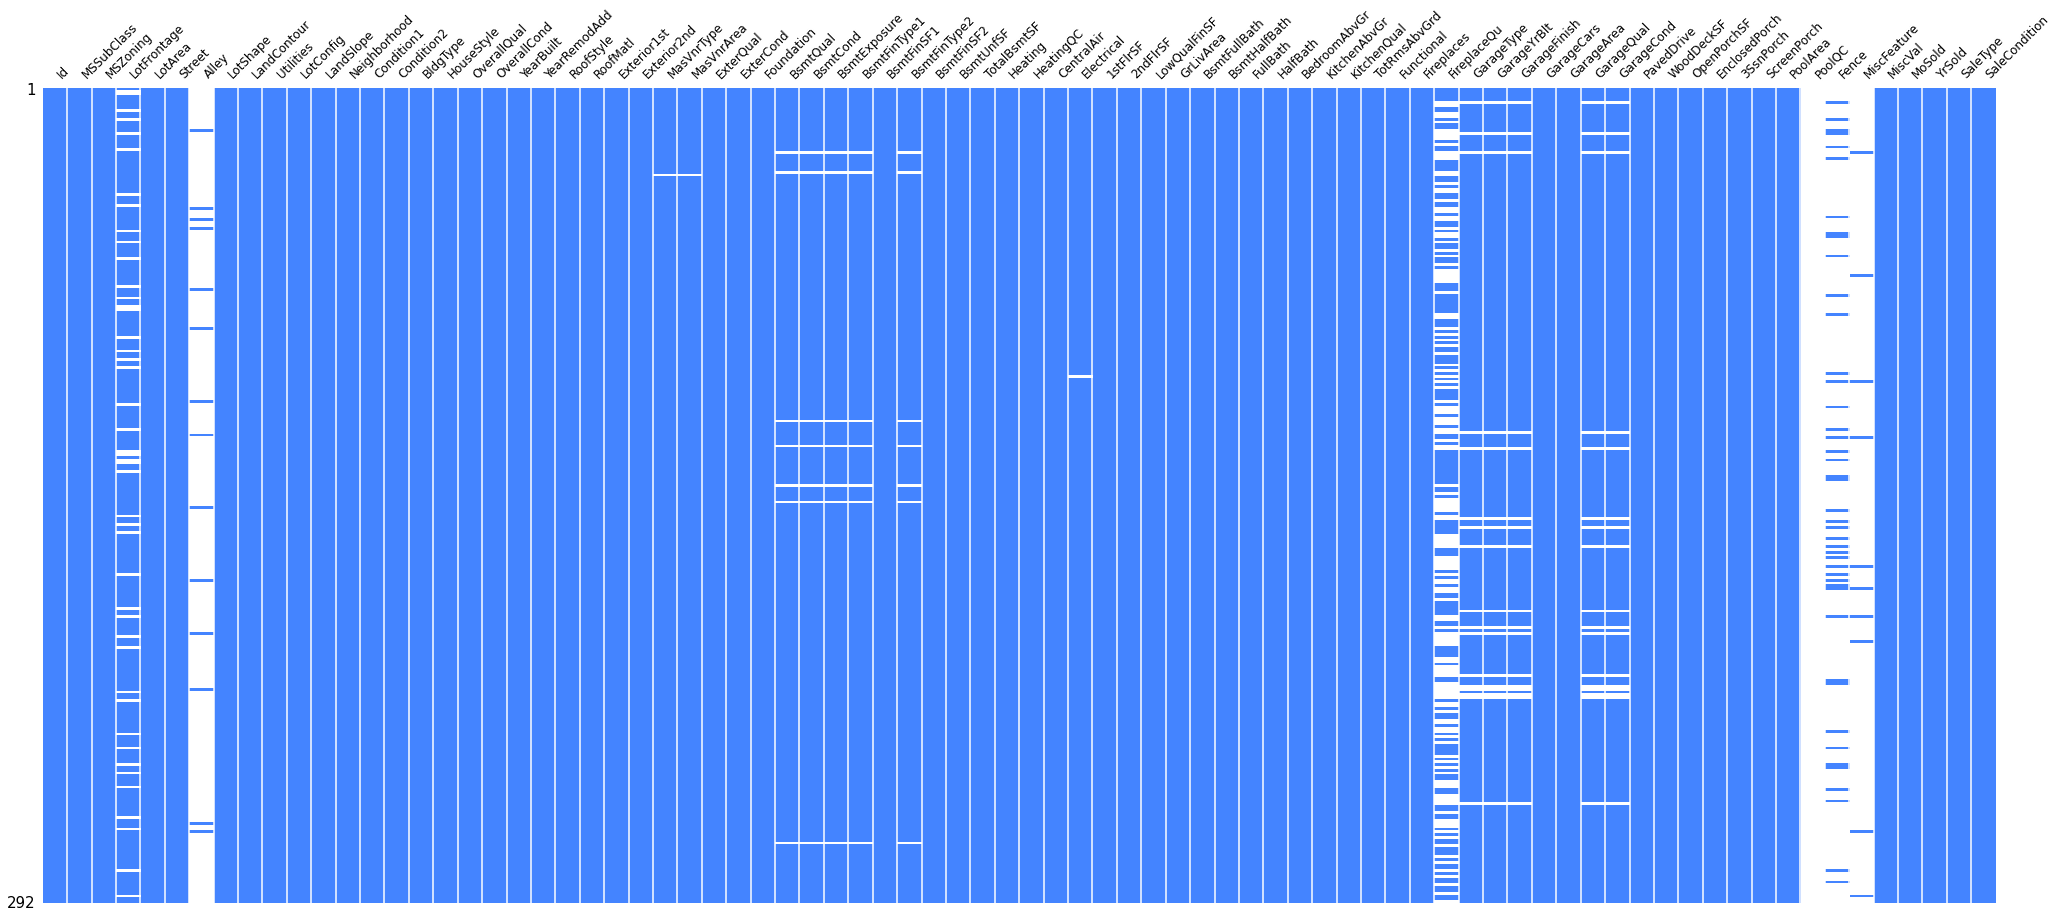

In [111]:
# Program to visualize missing values in dataset
# Importing the libraries
import missingno as msno
# Visualize missing values as a matrix
msno.matrix(df_test,labels=True, sparkline=False, figsize=(35,15), fontsize=12, color=(0.27, 0.52, 1.0))

In [112]:
#finding the percentage of null values in each columns
df_test.isna().mean().round(4) * 100

Id                 0.00
MSSubClass         0.00
MSZoning           0.00
LotFrontage       15.41
LotArea            0.00
Street             0.00
Alley             95.21
LotShape           0.00
LandContour        0.00
Utilities          0.00
LotConfig          0.00
LandSlope          0.00
Neighborhood       0.00
Condition1         0.00
Condition2         0.00
BldgType           0.00
HouseStyle         0.00
OverallQual        0.00
OverallCond        0.00
YearBuilt          0.00
YearRemodAdd       0.00
RoofStyle          0.00
RoofMatl           0.00
Exterior1st        0.00
Exterior2nd        0.00
MasVnrType         0.34
MasVnrArea         0.34
ExterQual          0.00
ExterCond          0.00
Foundation         0.00
BsmtQual           2.40
BsmtCond           2.40
BsmtExposure       2.40
BsmtFinType1       2.40
BsmtFinSF1         0.00
BsmtFinType2       2.40
BsmtFinSF2         0.00
BsmtUnfSF          0.00
TotalBsmtSF        0.00
Heating            0.00
HeatingQC          0.00
CentralAir      

In [113]:
df_test["Alley"].fillna("NA",inplace=True)
df_test["Alley"].isnull().sum()

0

In [114]:
df_test["Fence"].fillna("NA",inplace=True)
df_test["Fence"].isnull().sum()

0

In [115]:
df_test["PoolQC"].fillna("NA",inplace=True)
df_test["PoolQC"].isnull().sum()

0

In [116]:
df_test["MiscFeature"].fillna("NA",inplace=True)
df_test["MiscFeature"].isnull().sum()

0

In [117]:
df_test["FireplaceQu"].fillna("NA",inplace=True)
df_test["FireplaceQu"].isnull().sum()

0

In [118]:
df_test["GarageType"].fillna("NA",inplace=True)
df_test["GarageType"].isnull().sum()

0

In [119]:
df_test["GarageFinish"].fillna("NA",inplace=True)
df_test["GarageFinish"].isnull().sum()

0

In [120]:
df_test["GarageQual"].fillna("NA",inplace=True)
df_test["GarageQual"].isnull().sum()

0

In [121]:
df_test["GarageCond"].fillna("NA",inplace=True)
df_test["GarageCond"].isnull().sum()

0

In [122]:
df_test["BsmtQual"].fillna("NA",inplace=True)
df_test["BsmtQual"].isnull().sum()

0

In [123]:
df_test["BsmtCond"].fillna("NA",inplace=True)
df_test["BsmtCond"].isnull().sum()

0

In [124]:
df_test["BsmtExposure"].fillna("NA",inplace=True)
df_test["BsmtExposure"].isnull().sum()

0

In [125]:
df_test["BsmtFinType1"].fillna("NA",inplace=True)
df_test["BsmtFinType1"].isnull().sum()

0

In [126]:
df_test["BsmtFinType2"].fillna("NA",inplace=True)
df_test["BsmtFinType2"].isnull().sum()

0

In [127]:
df_test["MasVnrType"].fillna("NA",inplace=True)
df_test["MasVnrType"].isnull().sum()

0

In [128]:
df_test["MasVnrArea"].fillna(df_test["MasVnrArea"].mean(),inplace=True)
df_test["MasVnrArea"].isnull().sum()

0

In [129]:
df_test["LotFrontage"].fillna(df_test["LotFrontage"].mean(),inplace=True)
df_test["LotFrontage"].isnull().sum()

0

In [130]:
df_test=df_test.dropna()

In [131]:
df_test.shape

(274, 80)

In [132]:
df_test.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

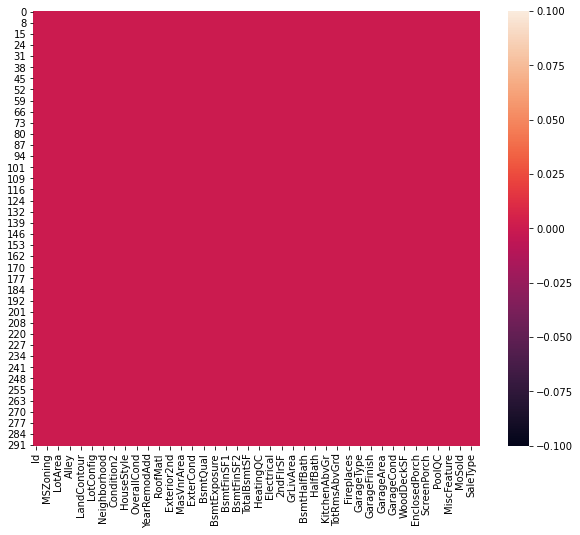

In [133]:
# Confirming null values
plt.figure(figsize=(10,8))
sn.heatmap(df_test.isnull())
plt.show()

In [134]:
df_test.drop(["Id"],axis=1,inplace=True)
df_test.drop(["Utilities"],axis=1,inplace=True)

In [135]:
df_test.shape

(274, 78)

In [136]:
cat_List_test = [x for x in df_test.columns if df_test[x].dtype==object]
list (cat_List_test)

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [137]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_List_test:
    df_test[i] = le.fit_transform(df_test[i].astype(str))
print (df_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 0 to 291
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     274 non-null    int64  
 1   MSZoning       274 non-null    int32  
 2   LotFrontage    274 non-null    float64
 3   LotArea        274 non-null    int64  
 4   Street         274 non-null    int32  
 5   Alley          274 non-null    int32  
 6   LotShape       274 non-null    int32  
 7   LandContour    274 non-null    int32  
 8   LotConfig      274 non-null    int32  
 9   LandSlope      274 non-null    int32  
 10  Neighborhood   274 non-null    int32  
 11  Condition1     274 non-null    int32  
 12  Condition2     274 non-null    int32  
 13  BldgType       274 non-null    int32  
 14  HouseStyle     274 non-null    int32  
 15  OverallQual    274 non-null    int64  
 16  OverallCond    274 non-null    int64  
 17  YearBuilt      274 non-null    int64  
 18  YearRemodA

In [138]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
dfte_new=sc.fit_transform(df_test)
dfte_new

array([[-0.85858125, -0.24902912,  0.98629289, ..., -0.63404001,
         0.23907988,  0.15124582],
       [ 1.48923574, -0.24902912, -0.01554571, ...,  0.85717856,
        -6.31170879, -3.30220039],
       [-0.85858125, -0.24902912, -0.01554571, ...,  0.85717856,
         0.23907988,  0.15124582],
       ...,
       [-0.85858125, -0.24902912, -0.01554571, ...,  1.60278784,
         0.23907988,  0.15124582],
       [-0.15423615,  1.88328274, -0.85617843, ..., -1.3796493 ,
         0.23907988,  0.15124582],
       [ 2.42836254,  1.88328274, -2.34039143, ..., -1.3796493 ,
         0.23907988,  0.15124582]])

In [139]:
fitted_model=pickle.load(open("Housing_Price_Prediction.pkl","rb"))

In [140]:
fitted_model

Ridge(alpha=20)

In [141]:
predictions=fitted_model.predict(dfte_new)

In [142]:
predictions

array([302016.48326055, 206584.35737607, 244227.46346304, 190669.42738628,
       224246.05591868, 141388.73167193, 282741.83999871, 250552.52497049,
       179418.57775892,  85453.02000967, 147133.24639159, 117243.83738586,
       211633.585446  , 273802.96292445, 150889.09188115, 129660.9461533 ,
       182238.10988657, 223476.02218723, 186671.96125873, 149015.82273131,
       142147.18893454, 121752.88766512, 133186.29874951, 181140.67128524,
       152662.29449898, 182747.72227597,  88002.70867021, 185801.0862549 ,
       201305.52392985, 223474.92236051, 179909.33617046, 133084.73208686,
       174904.39126702, 206246.88840243, 135993.05759564, 176144.27136974,
       156197.60786744, 105086.82584686, 296081.41311342, 206000.44194383,
       191153.17866217, 139741.04036534, 152231.63521842, 130273.28094799,
       111030.52303394, 211737.18751626, 300673.67845126, 157786.4390636 ,
       223732.20756484, 108277.63880736,  92421.30594737, 261597.14806575,
       136745.7132433 , 1

In [143]:
df_pred=pd.DataFrame({"Sales Price" : predictions })
df_pred

,Sales Price
0,302016.483261
1,206584.357376
2,244227.463463
3,190669.427386
4,224246.055919
5,141388.731672
6,282741.839999
7,250552.524970
8,179418.577759
9,85453.020010


# CONCLUSION REMARKS:
    1. we could see that using "RIDGE regression" gives a most promising predictions when compared with all other MOdels.
    2. Also many Factors influence the sale of a House, but year built, plot area, garage type, road access, availability of 
    some basic features seems to have a higher hand in deciding the sales price for a house.
   

# END